In [60]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
%%time
sns.set_style('darkgrid')

CPU times: user 368 µs, sys: 0 ns, total: 368 µs
Wall time: 373 µs


In [62]:
url_pokemons = 'https://raw.githubusercontent.com/PARULSHARM/kaggle_projects/refs/heads/master/pokemon/data/pokemon.csv'

In [63]:
url_combates = 'https://raw.githubusercontent.com/PARULSHARM/kaggle_projects/refs/heads/master/pokemon/data/combats.csv'

In [64]:
url_test = 'https://raw.githubusercontent.com/PARULSHARM/kaggle_projects/refs/heads/master/pokemon/data/tests.csv'

In [65]:
pokemons = pd.read_csv(url_pokemons)
pokemons.head()

#           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False

In [66]:
pokemons = pokemons.drop(columns=['#'])
pokemons.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
1        Ivysaur  Grass  Poison  60      62       63       80       80     60   
2       Venusaur  Grass  Poison  80      82       83      100      100     80   
3  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
4     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  
0           1      False  
1           1      False  
2           1      False  
3           1      False  
4           1      False

In [67]:
combates = pd.read_csv(url_combates)
combates.head()

First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151

In [68]:
test = pd.read_csv(url_test)
test.head()

First_pokemon  Second_pokemon
0            129             117
1            660             211
2            706             115
3            195             618
4             27             656

In [69]:
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [70]:
dict_pokemon_legendary = {
    False: 0,
    True: 1
}
pokemons['Legendary'] = pokemons['Legendary'].map(dict_pokemon_legendary)
pokemons.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
1        Ivysaur  Grass  Poison  60      62       63       80       80     60   
2       Venusaur  Grass  Poison  80      82       83      100      100     80   
3  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
4     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  
0           1          0  
1           1          0  
2           1          0  
3           1          0  
4           1          0

In [71]:
pk_colors = [
    "#A88820",  # Bug
    "#705848",  # Dark
    "#7038F8",  # Dragon
    "#F8D030",  # Electric
    "#EE99AC",  # Fairy
    "#C03028",  # Fighting
    "#F08030",  # Fire
    "#A890F0",  # Flying
    "#705898",  # Ghost
    "#78C850",  # Grass
    "#E0C068",  # Ground
    "#98D8D8",  # Ice
    "#A8A878",  # Normal
    "#A040A0",  # Poison
    "#F85888",  # Psychic
    "#B8A038",  # Rock
    "#B8B8D0",  # Steel
    "#6890F0"   # Water
]

In [72]:
pkt = pokemons['Type 1'].value_counts().sort_index()
pkt = pd.concat([pkt, pd.DataFrame(pk_colors, index=pkt.index, columns=['Colors'])], axis=1)
pkt.sort_values(by='count', ascending=False, inplace=True)
pkt

count   Colors
Type 1                  
Water       112  #6890F0
Normal       98  #A8A878
Grass        70  #78C850
Bug          69  #A88820
Psychic      57  #F85888
Fire         52  #F08030
Electric     44  #F8D030
Rock         44  #B8A038
Ghost        32  #705898
Ground       32  #E0C068
Dragon       32  #7038F8
Dark         31  #705848
Poison       28  #A040A0
Fighting     27  #C03028
Steel        27  #B8B8D0
Ice          24  #98D8D8
Fairy        17  #EE99AC
Flying        4  #A890F0

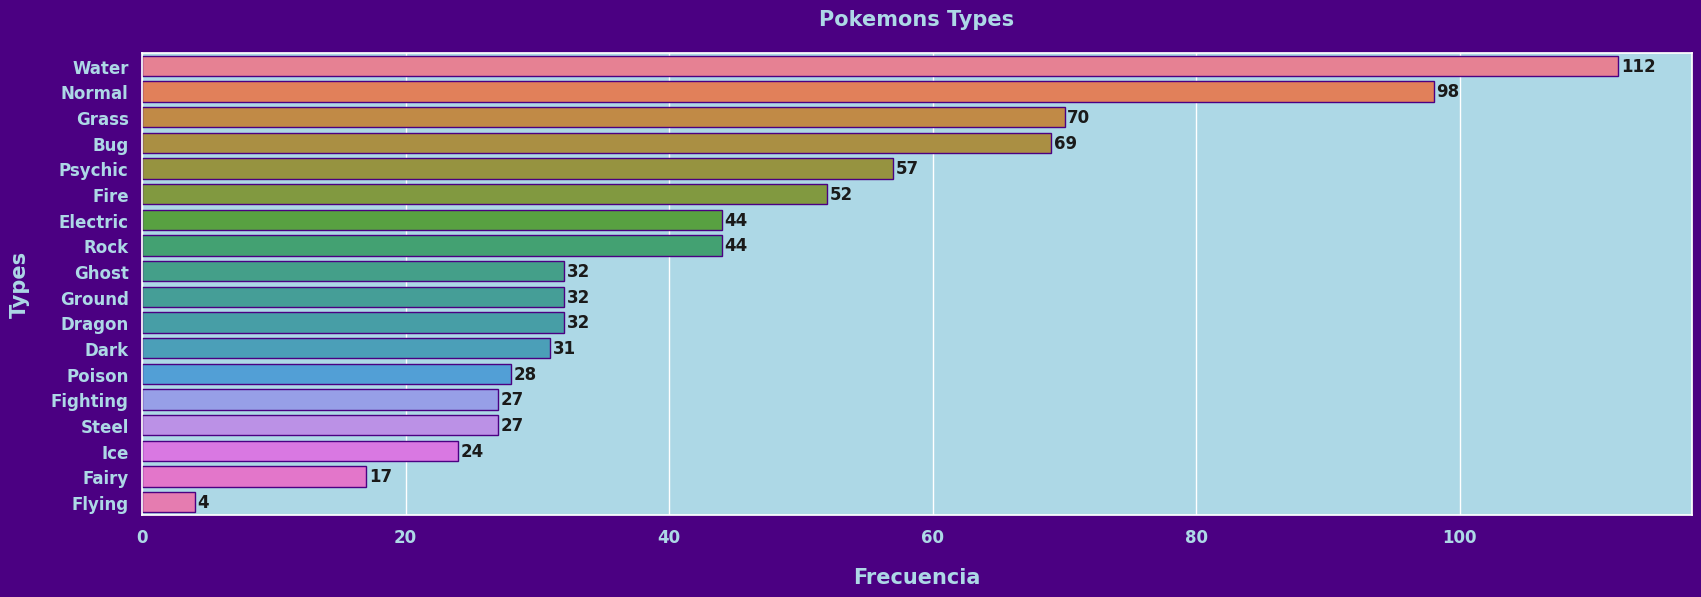

In [73]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
ax = sns.barplot(x=pkt['count'], y=pkt.index, hue=pkt['Colors'], edgecolor='indigo' )
plt.title('Pokemons Types', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Frecuencia', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Types', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
for container in ax.containers:
    ax.bar_label(container,
                label_type='edge',
                padding=2,
                color='k',
                fontsize=12,
                fontweight='bold',
                fmt='{:,.0f}')
plt.legend().remove()
plt.show()

In [74]:
pk_colors_new = [
    "#6B8E23",  # Bug (Verde oliva oscuro)
    "#2F4F4F",  # Dark (Gris pizarra oscuro)
    "#8A2BE2",  # Dragon (Azul violeta)
    "#FFD700",  # Electric (Oro)
    "#DDA0DD",  # Fairy (Ciruela)
    "#8B0000",  # Fighting (Rojo oscuro)
    "#FF4500",  # Fire (Naranja rojizo)
    "#87CEEB",  # Flying (Cielo azul)
    "#4B0082",  # Ghost (Índigo)
    "#32CD32",  # Grass (Lima verde)
    "#DEB887",  # Ground (Madera)
    "#ADD8E6",  # Ice (Azul claro)
    "#D3D3D3",  # Normal (Gris claro)
    "#9370DB",  # Poison (Lila medio)
    "#DB7093",  # Psychic (Rosa pálido)
    "#DAA520",  # Rock (Amarillo dorado)
    "#708090",  # Steel (Gris acero)
    "#4682B4"   # Water (Azul acero)
]

In [75]:
pkt2 = pokemons['Type 2'].value_counts().sort_index()
pkt2 = pd.concat([pkt2, pd.DataFrame(pk_colors_new, index=pkt2.index, columns=['Colors2'])], axis=1)
pkt2.sort_values(by='count', ascending=False, inplace=True)
pkt2

count  Colors2
Type 2                  
Flying       97  #87CEEB
Ground       35  #DEB887
Poison       34  #9370DB
Psychic      33  #DB7093
Fighting     26  #8B0000
Grass        25  #32CD32
Fairy        23  #DDA0DD
Steel        22  #708090
Dark         20  #2F4F4F
Dragon       18  #8A2BE2
Rock         14  #DAA520
Water        14  #4682B4
Ice          14  #ADD8E6
Ghost        14  #4B0082
Fire         12  #FF4500
Electric      6  #FFD700
Normal        4  #D3D3D3
Bug           3  #6B8E23

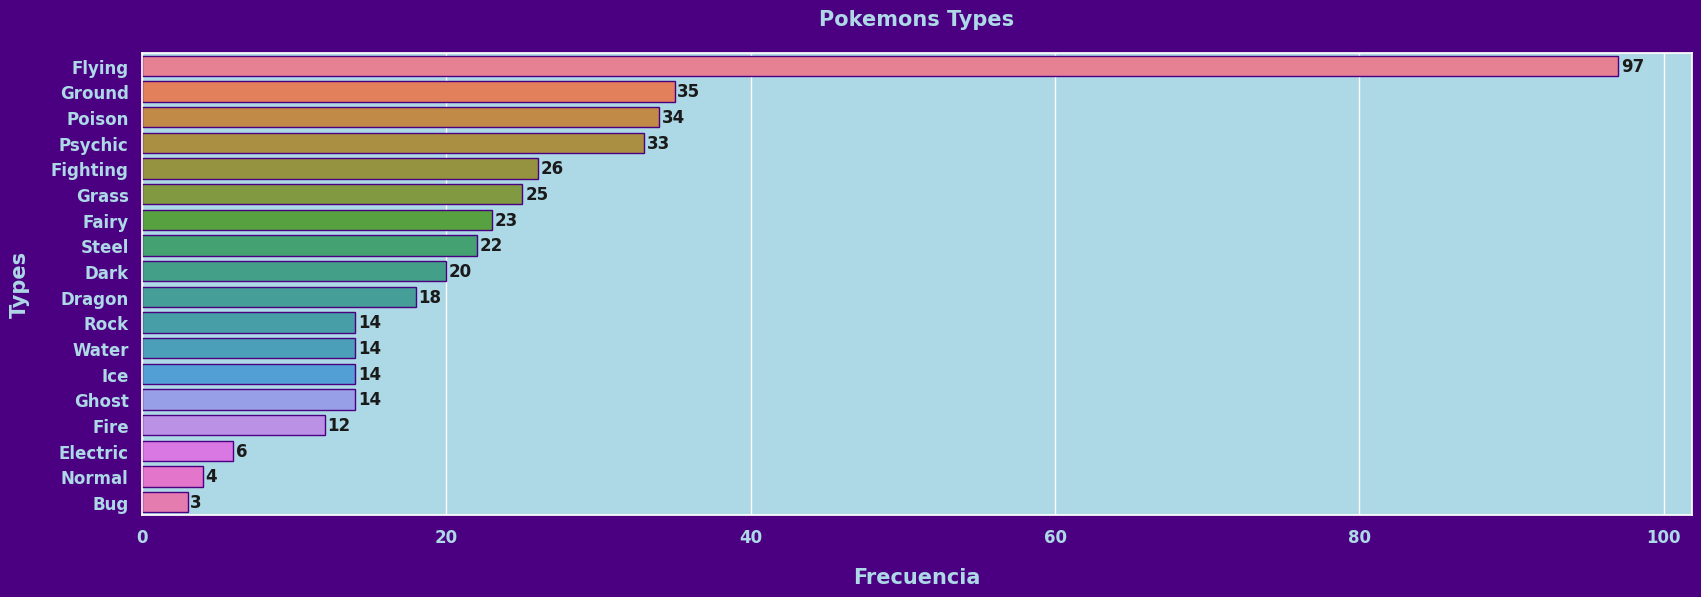

In [76]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
ax = sns.barplot(x=pkt2['count'], y=pkt2.index, hue=pkt2['Colors2'], edgecolor='indigo' )
plt.title('Pokemons Types', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Frecuencia', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Types', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
for container in ax.containers:
    ax.bar_label(container,
                label_type='edge',
                padding=2,
                color='k',
                fontsize=12,
                fontweight='bold',
                fmt='{:,.0f}')
plt.legend().remove()
plt.show()

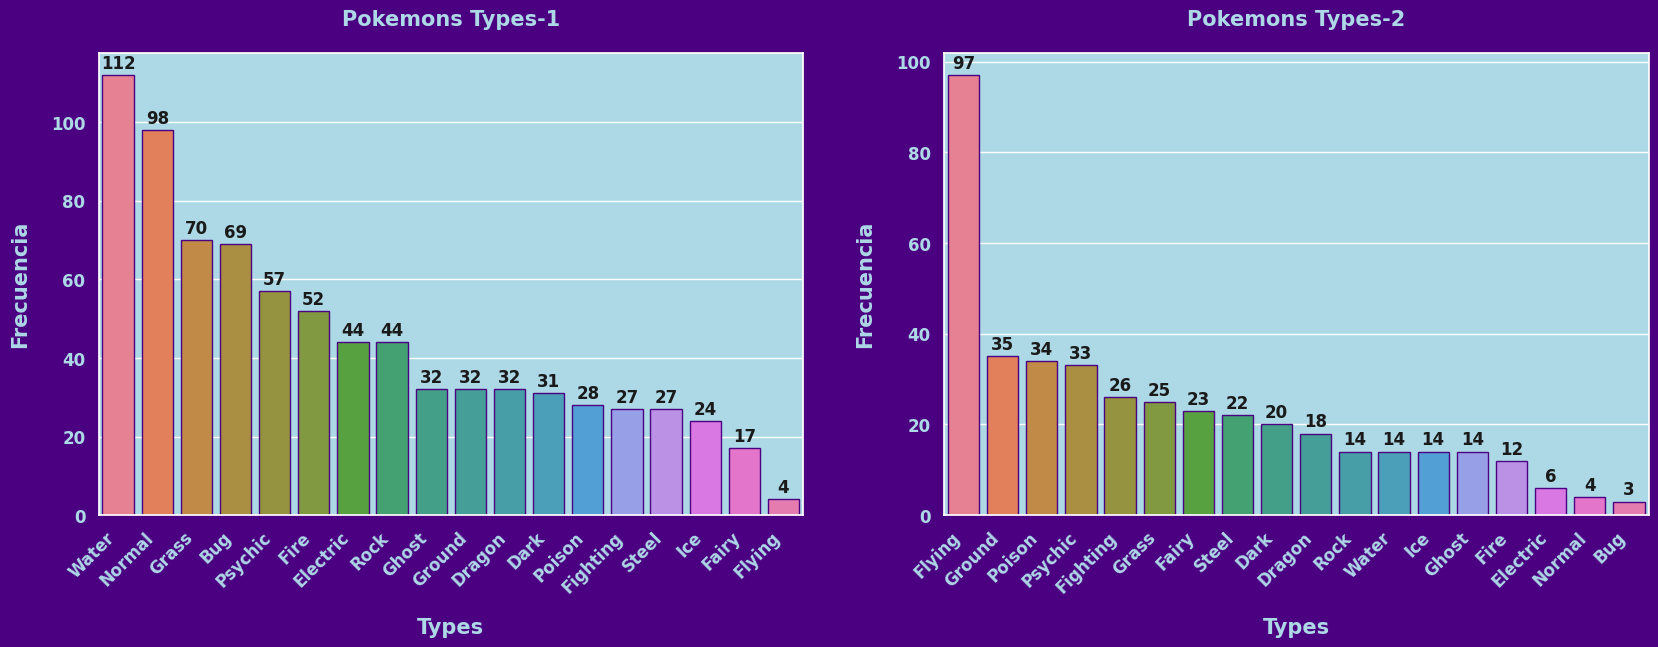

In [77]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.barplot(y=pkt['count'], x=pkt.index, hue=pkt['Colors'], edgecolor='indigo' )
plt.title('Pokemons Types-1', color='lightblue', size=15, weight='bold', pad=20)
plt.ylabel('Frecuencia', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xlabel('Types', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold', rotation=45, ha='right')
plt.yticks(color='lightblue', size=12, weight='bold')
for container in ax.containers:
    ax.bar_label(container,
                label_type='edge',
                padding=2,
                color='k',
                fontsize=12,
                fontweight='bold',
                fmt='{:,.0f}')
plt.legend().remove()
plt.subplot(1,2,2)
ax = sns.barplot(y=pkt2['count'], x=pkt2.index, hue=pkt2['Colors2'], edgecolor='indigo' )
plt.title('Pokemons Types-2', color='lightblue', size=15, weight='bold', pad=20)
plt.ylabel('Frecuencia', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xlabel('Types', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold', rotation=45, ha='right')
plt.yticks(color='lightblue', size=12, weight='bold')
for container in ax.containers:
    ax.bar_label(container,
                label_type='edge',
                padding=2,
                color='k',
                fontsize=12,
                fontweight='bold',
                fmt='{:,.0f}')
plt.legend().remove()
plt.show()

In [78]:
pkt3 = pkt.merge(pkt2, left_index=True, right_index=True, how='inner')

In [79]:
pkt3

count_x   Colors  count_y  Colors2
Water         112  #6890F0       14  #4682B4
Normal         98  #A8A878        4  #D3D3D3
Grass          70  #78C850       25  #32CD32
Bug            69  #A88820        3  #6B8E23
Psychic        57  #F85888       33  #DB7093
Fire           52  #F08030       12  #FF4500
Electric       44  #F8D030        6  #FFD700
Rock           44  #B8A038       14  #DAA520
Ghost          32  #705898       14  #4B0082
Ground         32  #E0C068       35  #DEB887
Dragon         32  #7038F8       18  #8A2BE2
Dark           31  #705848       20  #2F4F4F
Poison         28  #A040A0       34  #9370DB
Fighting       27  #C03028       26  #8B0000
Steel          27  #B8B8D0       22  #708090
Ice            24  #98D8D8       14  #ADD8E6
Fairy          17  #EE99AC       23  #DDA0DD
Flying          4  #A890F0       97  #87CEEB

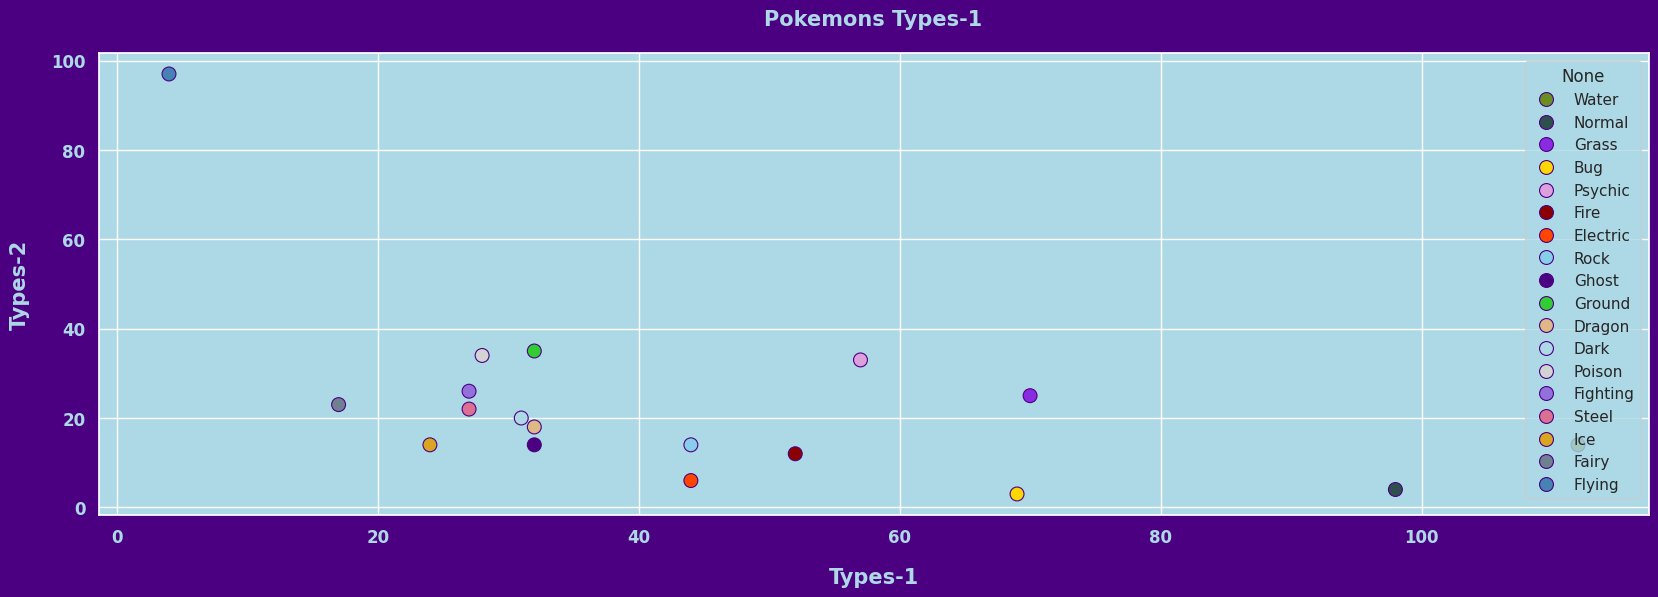

In [80]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
sns.scatterplot(x=pkt3['count_x'], y=pkt3['count_y'], hue=pkt3.index, palette=pk_colors_new, markers='o',s=100, edgecolor='indigo')
plt.title('Pokemons Types-1', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Types-1', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Types-2', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.show()

In [81]:
pokemons.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
1        Ivysaur  Grass  Poison  60      62       63       80       80     60   
2       Venusaur  Grass  Poison  80      82       83      100      100     80   
3  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
4     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  
0           1          0  
1           1          0  
2           1          0  
3           1          0  
4           1          0

In [82]:
pokemons_pivoteado1 = pokemons.pivot_table(index='Type 1',
                                          values=['Attack','Defense','HP','Sp. Atk','Sp. Def','Speed'],
                                          aggfunc='mean')
pokemons_pivoteado1.head()

Attack    Defense         HP    Sp. Atk    Sp. Def      Speed
Type 1                                                                     
Bug        70.971014  70.724638  56.884058  53.869565  64.797101  61.681159
Dark       88.387097  70.225806  66.806452  74.645161  69.516129  76.161290
Dragon    112.125000  86.375000  83.312500  96.843750  88.843750  83.031250
Electric   69.090909  66.295455  59.795455  90.022727  73.704545  84.500000
Fairy      61.529412  65.705882  74.117647  78.529412  84.705882  48.588235

In [83]:
pokemons_pivoteado2 = pokemons.pivot_table(index='Type 2',
                                          values=['Attack','Defense','HP','Sp. Atk','Sp. Def','Speed'],
                                          aggfunc='mean')
pokemons_pivoteado2.head()

Attack    Defense         HP    Sp. Atk    Sp. Def      Speed
Type 2                                                                     
Bug        90.000000  80.000000  53.333333  46.666667  61.666667  61.666667
Dark      109.800000  72.050000  75.550000  81.800000  69.850000  75.350000
Dragon     94.444444  87.055556  82.166667  98.500000  83.444444  80.555556
Electric   72.666667  68.333333  88.166667  81.166667  73.500000  71.500000
Fairy      61.608696  73.869565  64.304348  75.000000  81.956522  61.217391

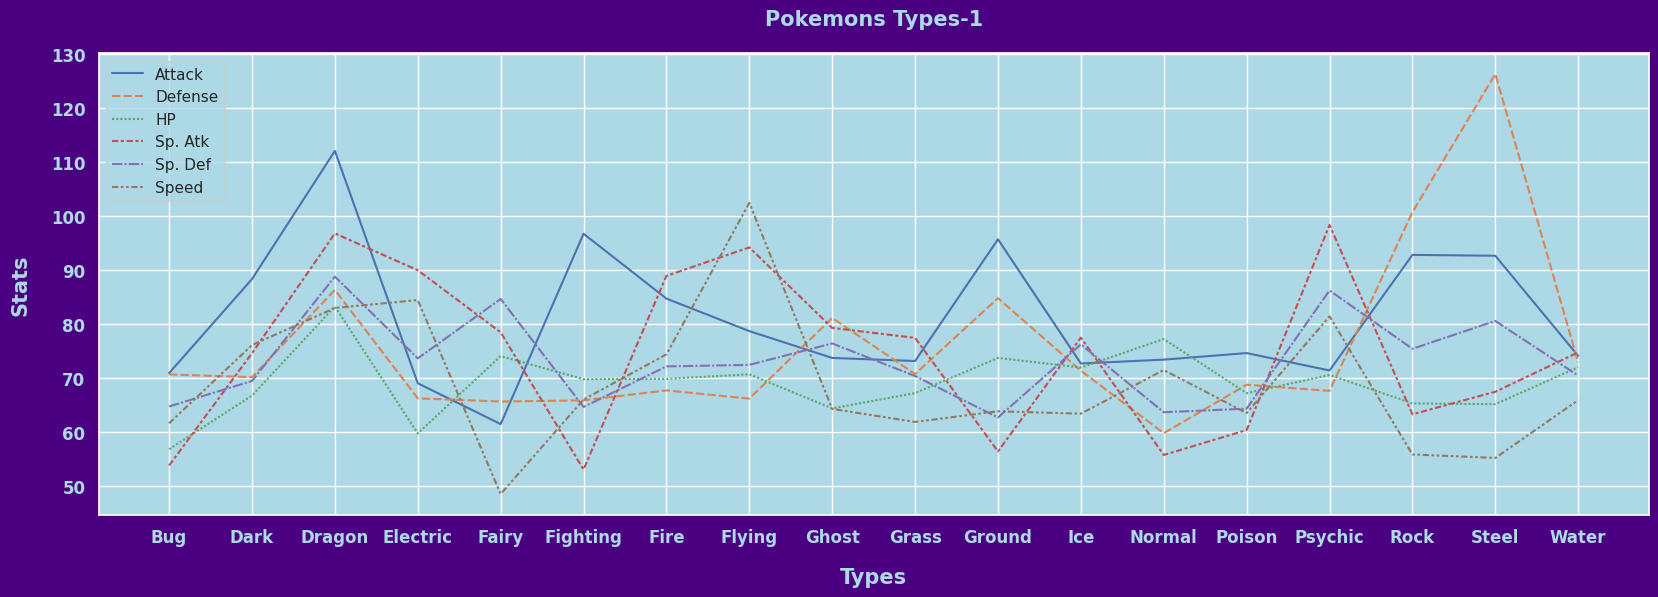

In [84]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
sns.lineplot(data=pokemons_pivoteado1)
plt.title('Pokemons Types-1', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Types', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Stats', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.show()

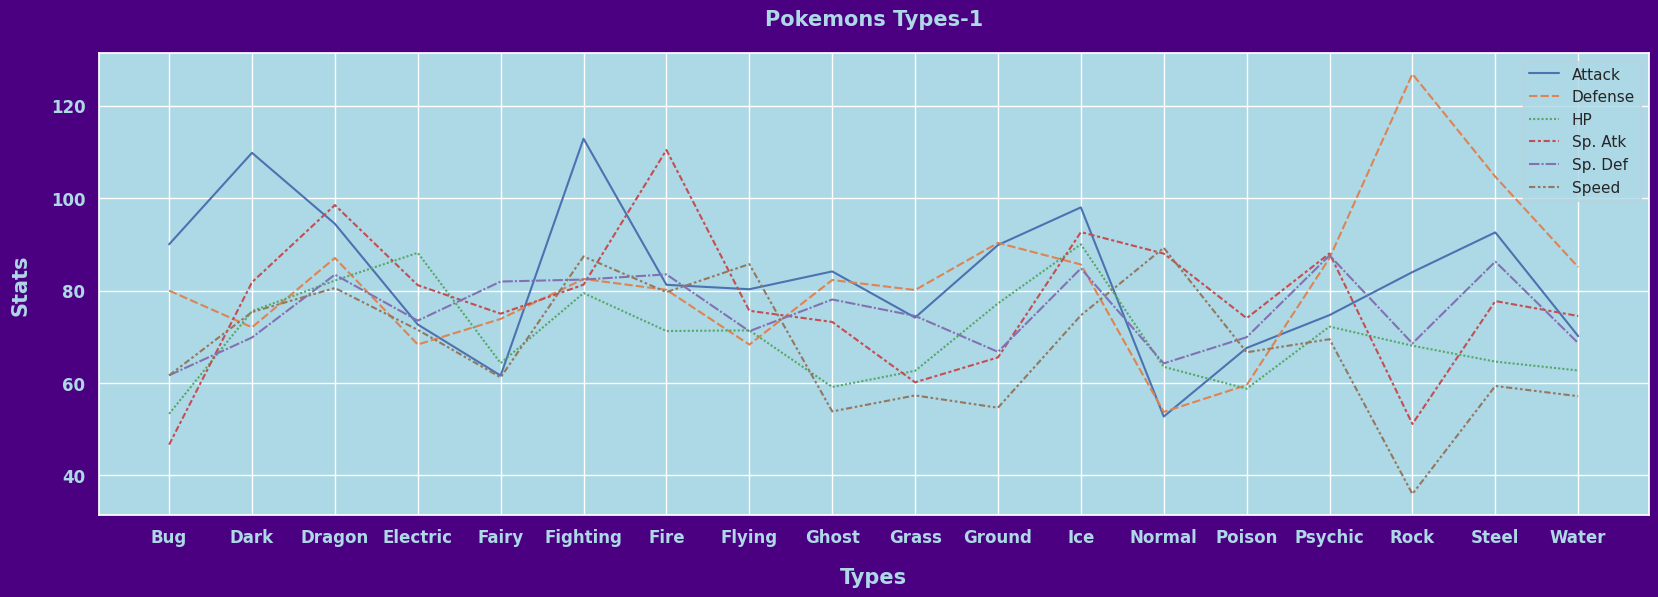

In [85]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
sns.lineplot(data=pokemons_pivoteado2)
plt.title('Pokemons Types-1', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Types', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Stats', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.show()

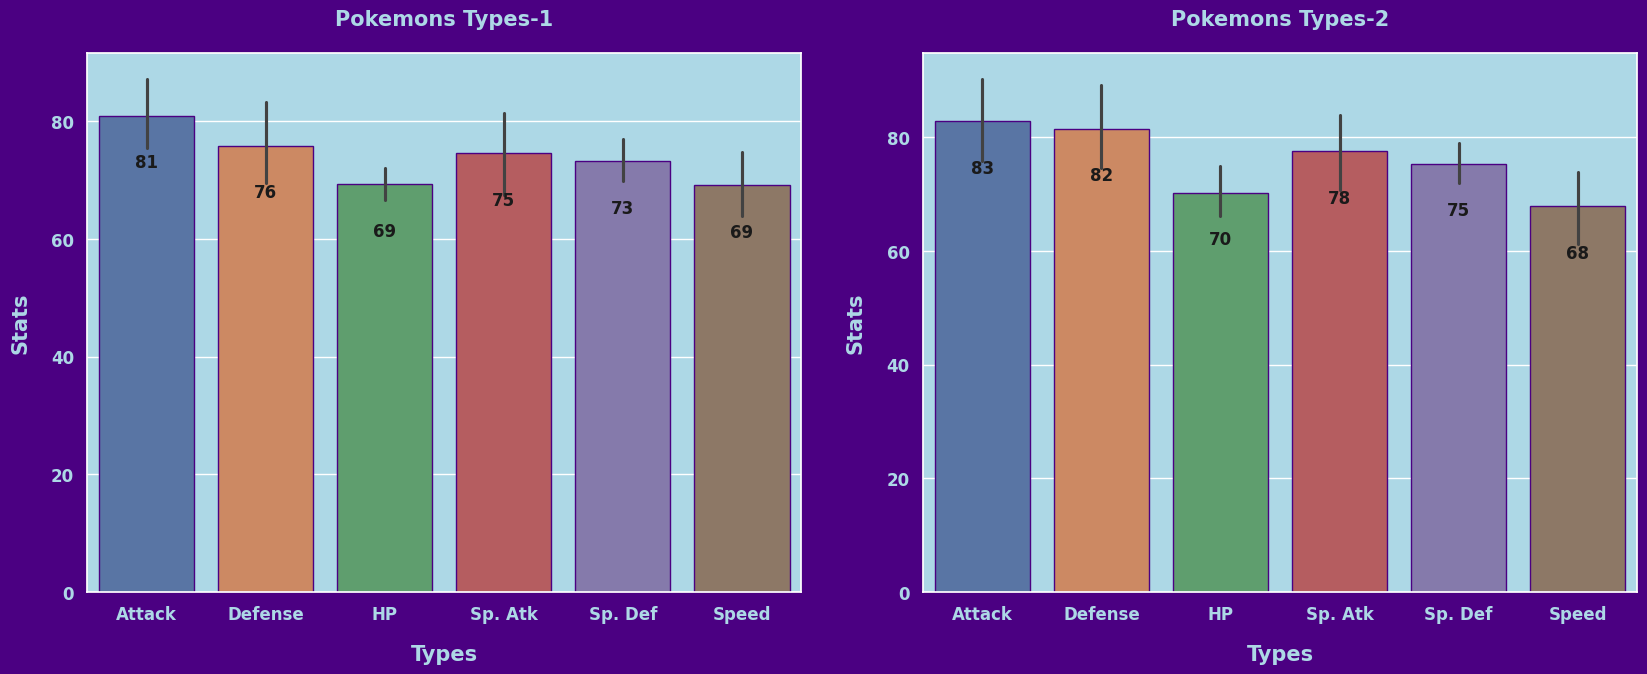

In [86]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
ax = sns.barplot(data=pokemons_pivoteado1, edgecolor='indigo')
plt.title('Pokemons Types-1', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Types', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Stats', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
for container in ax.containers:
    ax.bar_label(container,
                label_type='edge',
                padding=-40,
                color='k',
                fontsize=12,
                fontweight='bold',
                fmt='{:,.0f}')
plt.subplot(1,2,2)
ax = sns.barplot(data=pokemons_pivoteado2, edgecolor='indigo')
plt.title('Pokemons Types-2', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Types', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Stats', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
for container in ax.containers:
    ax.bar_label(container,
                label_type='edge',
                padding=-40,
                color='k',
                fontsize=12,
                fontweight='bold',
                fmt='{:,.0f}')
plt.subplots_adjust(wspace=0.17)
plt.show()

In [87]:
pokemons.sample()

Name  Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
34  Nidoran♀  Poison    NaN  55      47       52       40       40     41   

    Generation  Legendary  
34           1          0

In [88]:
pokemons_legendarios1 = pokemons.groupby(by='Type 1')['Legendary'].sum().sort_values(ascending=False)
pokemons_legendarios1 = pokemons_legendarios1.to_frame()
pokemons_legendarios1 = pokemons_legendarios1.rename(columns={'Legendary':'Legendary_1'})
pokemons_legendarios1

Legendary_1
Type 1               
Psychic            14
Dragon             12
Fire                5
Water               4
Ground              4
Electric            4
Steel               4
Rock                4
Grass               3
Dark                2
Ghost               2
Ice                 2
Normal              2
Flying              2
Fairy               1
Poison              0
Fighting            0
Bug                 0

In [89]:
pokemons_legendarios2 = pokemons.groupby(by='Type 2')['Legendary'].sum().sort_values(ascending=False)
pokemons_legendarios2 = pokemons_legendarios2.to_frame()
pokemons_legendarios2 = pokemons_legendarios2.rename(columns={'Legendary':'Legendary_2'})
pokemons_legendarios2

Legendary_2
Type 2               
Flying             13
Psychic             5
Dragon              4
Fighting            4
Fire                3
Ice                 3
Fairy               2
Water               1
Electric            1
Ghost               1
Dark                1
Ground              1
Steel               1
Rock                0
Bug                 0
Poison              0
Normal              0
Grass               0

In [90]:
pokemons_legendarios3 = pd.concat([pokemons_legendarios1, pokemons_legendarios2] , axis=1)
pokemons_legendarios3

Legendary_1  Legendary_2
Psychic            14            5
Dragon             12            4
Fire                5            3
Water               4            1
Ground              4            1
Electric            4            1
Steel               4            1
Rock                4            0
Grass               3            0
Dark                2            1
Ghost               2            1
Ice                 2            3
Normal              2            0
Flying              2           13
Fairy               1            2
Poison              0            0
Fighting            0            4
Bug                 0            0

In [91]:
pokemons_legendarios3['Total_legendarios'] = pokemons_legendarios3['Legendary_1'] + pokemons_legendarios3['Legendary_2']
pokemons_legendarios3


Legendary_1  Legendary_2  Total_legendarios
Psychic            14            5                 19
Dragon             12            4                 16
Fire                5            3                  8
Water               4            1                  5
Ground              4            1                  5
Electric            4            1                  5
Steel               4            1                  5
Rock                4            0                  4
Grass               3            0                  3
Dark                2            1                  3
Ghost               2            1                  3
Ice                 2            3                  5
Normal              2            0                  2
Flying              2           13                 15
Fairy               1            2                  3
Poison              0            0                  0
Fighting            0            4                  4
Bug                 0            0                  0

In [92]:
pokemons_legendarios3.describe()

Legendary_1  Legendary_2  Total_legendarios
count    18.000000    18.000000          18.000000
mean      3.611111     2.222222           5.833333
std       3.759520     3.116475           5.371493
min       0.000000     0.000000           0.000000
25%       2.000000     0.250000           3.000000
50%       2.500000     1.000000           4.500000
75%       4.000000     3.000000           5.000000
max      14.000000    13.000000          19.000000

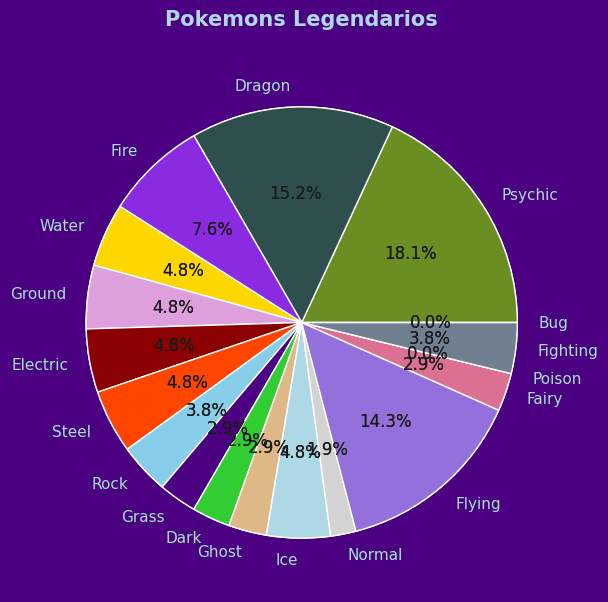

In [93]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,7))
pie_wedge = plt.pie(pokemons_legendarios3['Total_legendarios'], labels=pokemons_legendarios3.index, autopct='%1.1f%%', colors=pk_colors_new )
plt.title('Pokemons Legendarios', color='lightblue', size=15, weight='bold', pad=20)
pie_wedge, texts, autotexts = plt.pie(pokemons_legendarios3['Total_legendarios'], labels=pokemons_legendarios3.index, autopct='%1.1f%%', colors=pk_colors_new)
for text, autotext in zip(texts, autotexts):
    text.set_color('lightblue')
    autotext.set_color('k')
plt.show()

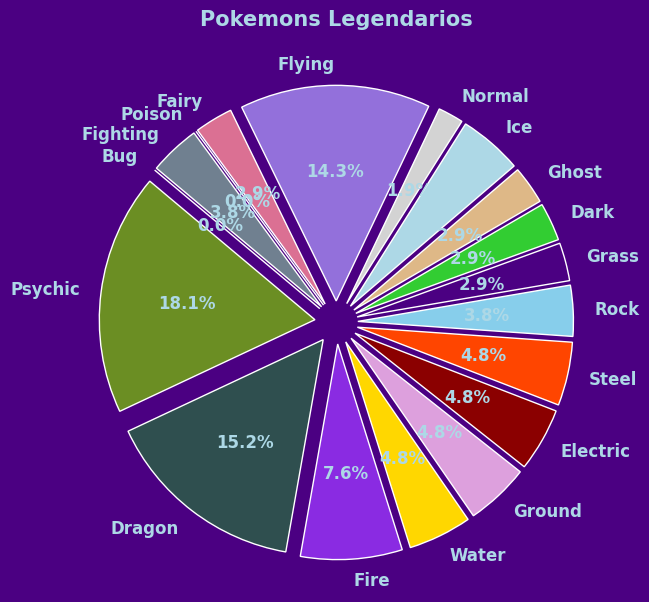

In [94]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'indigo'})

# Create the pie chart with explode for all slices
plt.figure(figsize=(20, 7))
explode_values = [0.1 for _ in range(len(pokemons_legendarios3))]  # Create list with 0.1 for each slice
pie_wedge = plt.pie(pokemons_legendarios3['Total_legendarios'], labels=pokemons_legendarios3.index,
                   autopct='%1.1f%%', colors=pk_colors_new, startangle=140, explode=explode_values,
                   textprops={'color': 'lightblue', 'weight': 'bold', 'fontsize': 12},) # Apply text properties directly


# Set title
plt.title('Pokemons Legendarios', color='lightblue', size=15, weight='bold', pad=20)

# Display the plot
plt.show()

In [95]:
pokemons.sample()

Name   Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
637  Gothitelle  Psychic    NaN  70      55       95       95      110     65   

     Generation  Legendary  
637           5          0

In [96]:
poquemons_generacion = pokemons.pivot_table(index='Generation', values=['Attack','Defense','HP','Sp. Atk','Sp. Def','Speed'], aggfunc='mean')
poquemons_generacion

Attack    Defense         HP    Sp. Atk    Sp. Def      Speed
Generation                                                                  
1           76.638554  70.861446  65.819277  71.819277  69.090361  72.584337
2           72.028302  73.386792  71.207547  65.943396  73.905660  61.811321
3           81.625000  74.100000  66.543750  75.806250  71.225000  66.925000
4           82.867769  78.132231  73.082645  76.404959  77.190083  71.338843
5           82.066667  72.327273  71.787879  71.987879  68.739394  68.078788
6           75.804878  76.682927  68.268293  74.292683  74.890244  66.439024

In [97]:
poquemons_long = pd.melt(poquemons_generacion.reset_index(), id_vars=['Generation'], var_name='Variable', value_name='Value')
poquemons_long

Generation Variable      Value
0            1   Attack  76.638554
1            2   Attack  72.028302
2            3   Attack  81.625000
3            4   Attack  82.867769
4            5   Attack  82.066667
5            6   Attack  75.804878
6            1  Defense  70.861446
7            2  Defense  73.386792
8            3  Defense  74.100000
9            4  Defense  78.132231
10           5  Defense  72.327273
11           6  Defense  76.682927
12           1       HP  65.819277
13           2       HP  71.207547
14           3       HP  66.543750
15           4       HP  73.082645
16           5       HP  71.787879
17           6       HP  68.268293
18           1  Sp. Atk  71.819277
19           2  Sp. Atk  65.943396
20           3  Sp. Atk  75.806250
21           4  Sp. Atk  76.404959
22           5  Sp. Atk  71.987879
23           6  Sp. Atk  74.292683
24           1  Sp. Def  69.090361
25           2  Sp. Def  73.905660
26           3  Sp. Def  71.225000
27           4  Sp. Def  77.190083
28           5  Sp. Def  68.739394
29           6  Sp. Def  74.890244
30           1    Speed  72.584337
31           2    Speed  61.811321
32           3    Speed  66.925000
33           4    Speed  71.338843
34           5    Speed  68.078788
35           6    Speed  66.439024

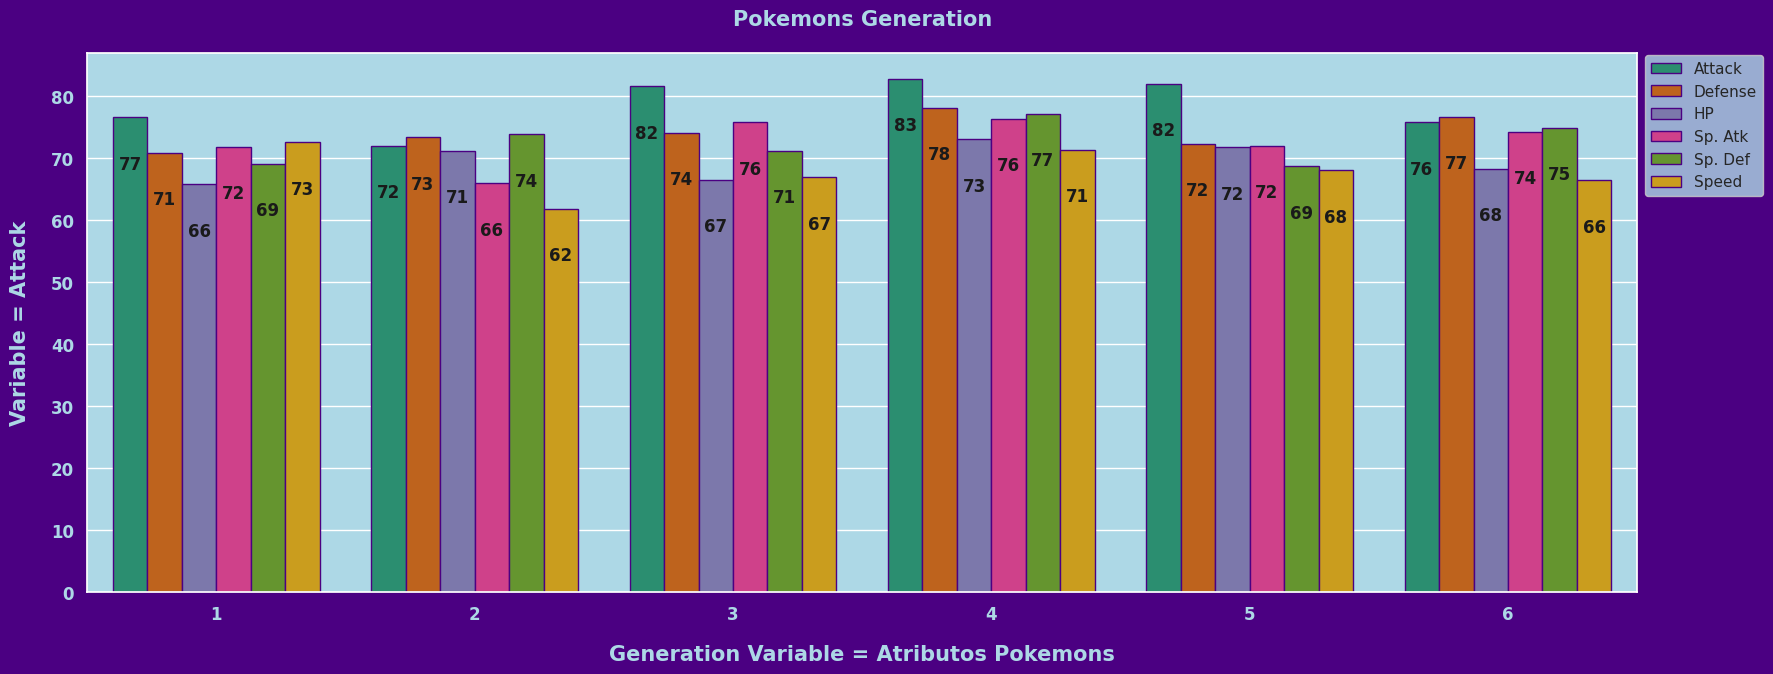

In [98]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,7))
ax = sns.barplot(x='Generation', y='Value', hue='Variable', data=poquemons_long, edgecolor='indigo', palette='Dark2')
plt.title('Pokemons Generation', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Generation Variable = Atributos Pokemons', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Variable = Attack', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
for container in ax.containers:
    ax.bar_label(container,
                label_type='edge',
                padding=-40,
                color='k',
                fontsize=12,
                fontweight='bold',
                fmt='{:,.0f}')
plt.legend(bbox_to_anchor=(1,1.01), loc='upper left', )
plt.show()




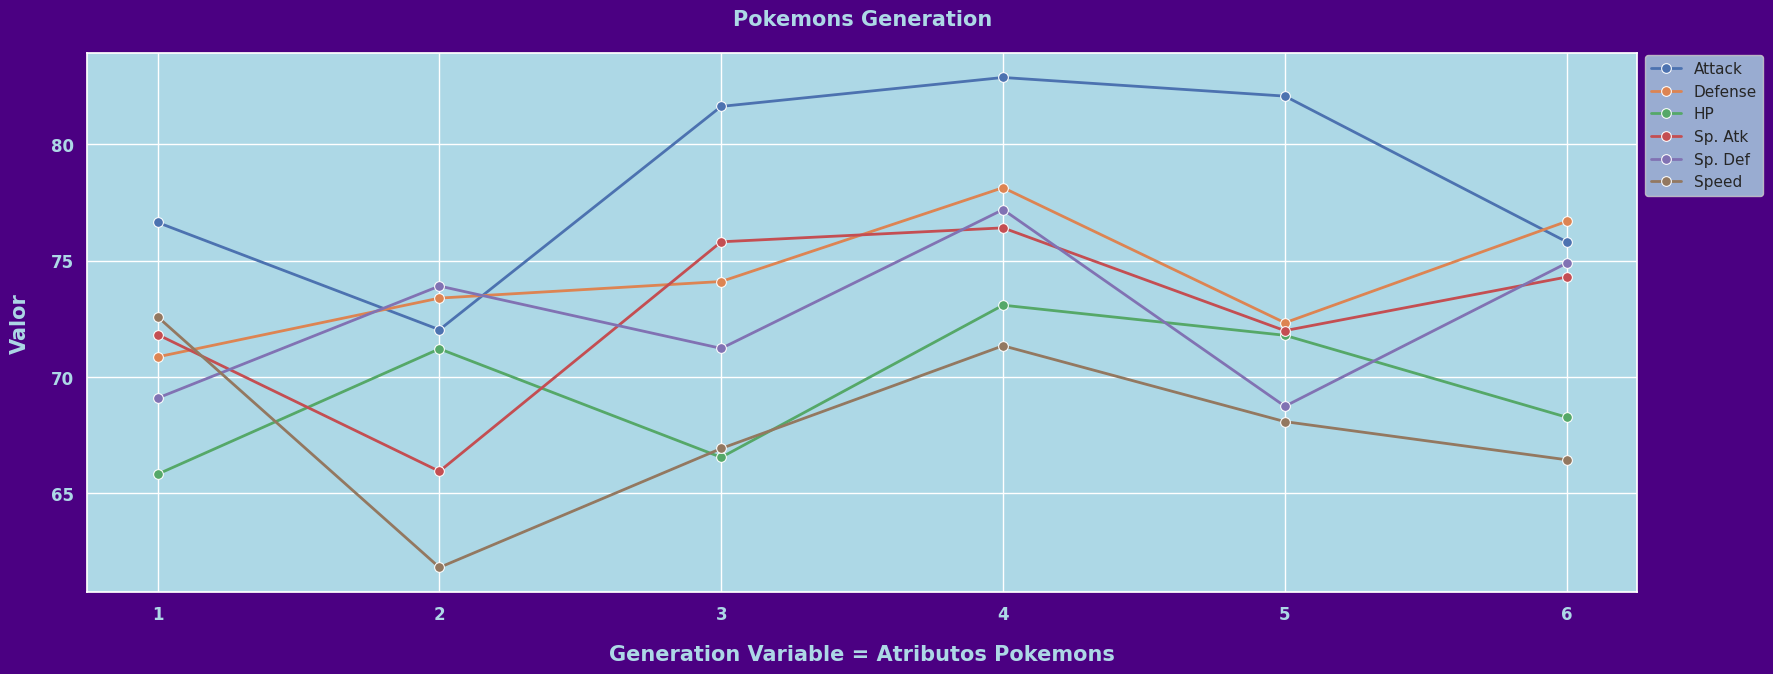

In [99]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,7))
sns.lineplot(data=poquemons_long, x='Generation', y='Value', hue='Variable', marker='o', markersize=7, linewidth=2)
plt.title('Pokemons Generation', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Generation Variable = Atributos Pokemons', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Valor', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.legend(bbox_to_anchor=(1,1.01), loc='upper left', )
plt.show()

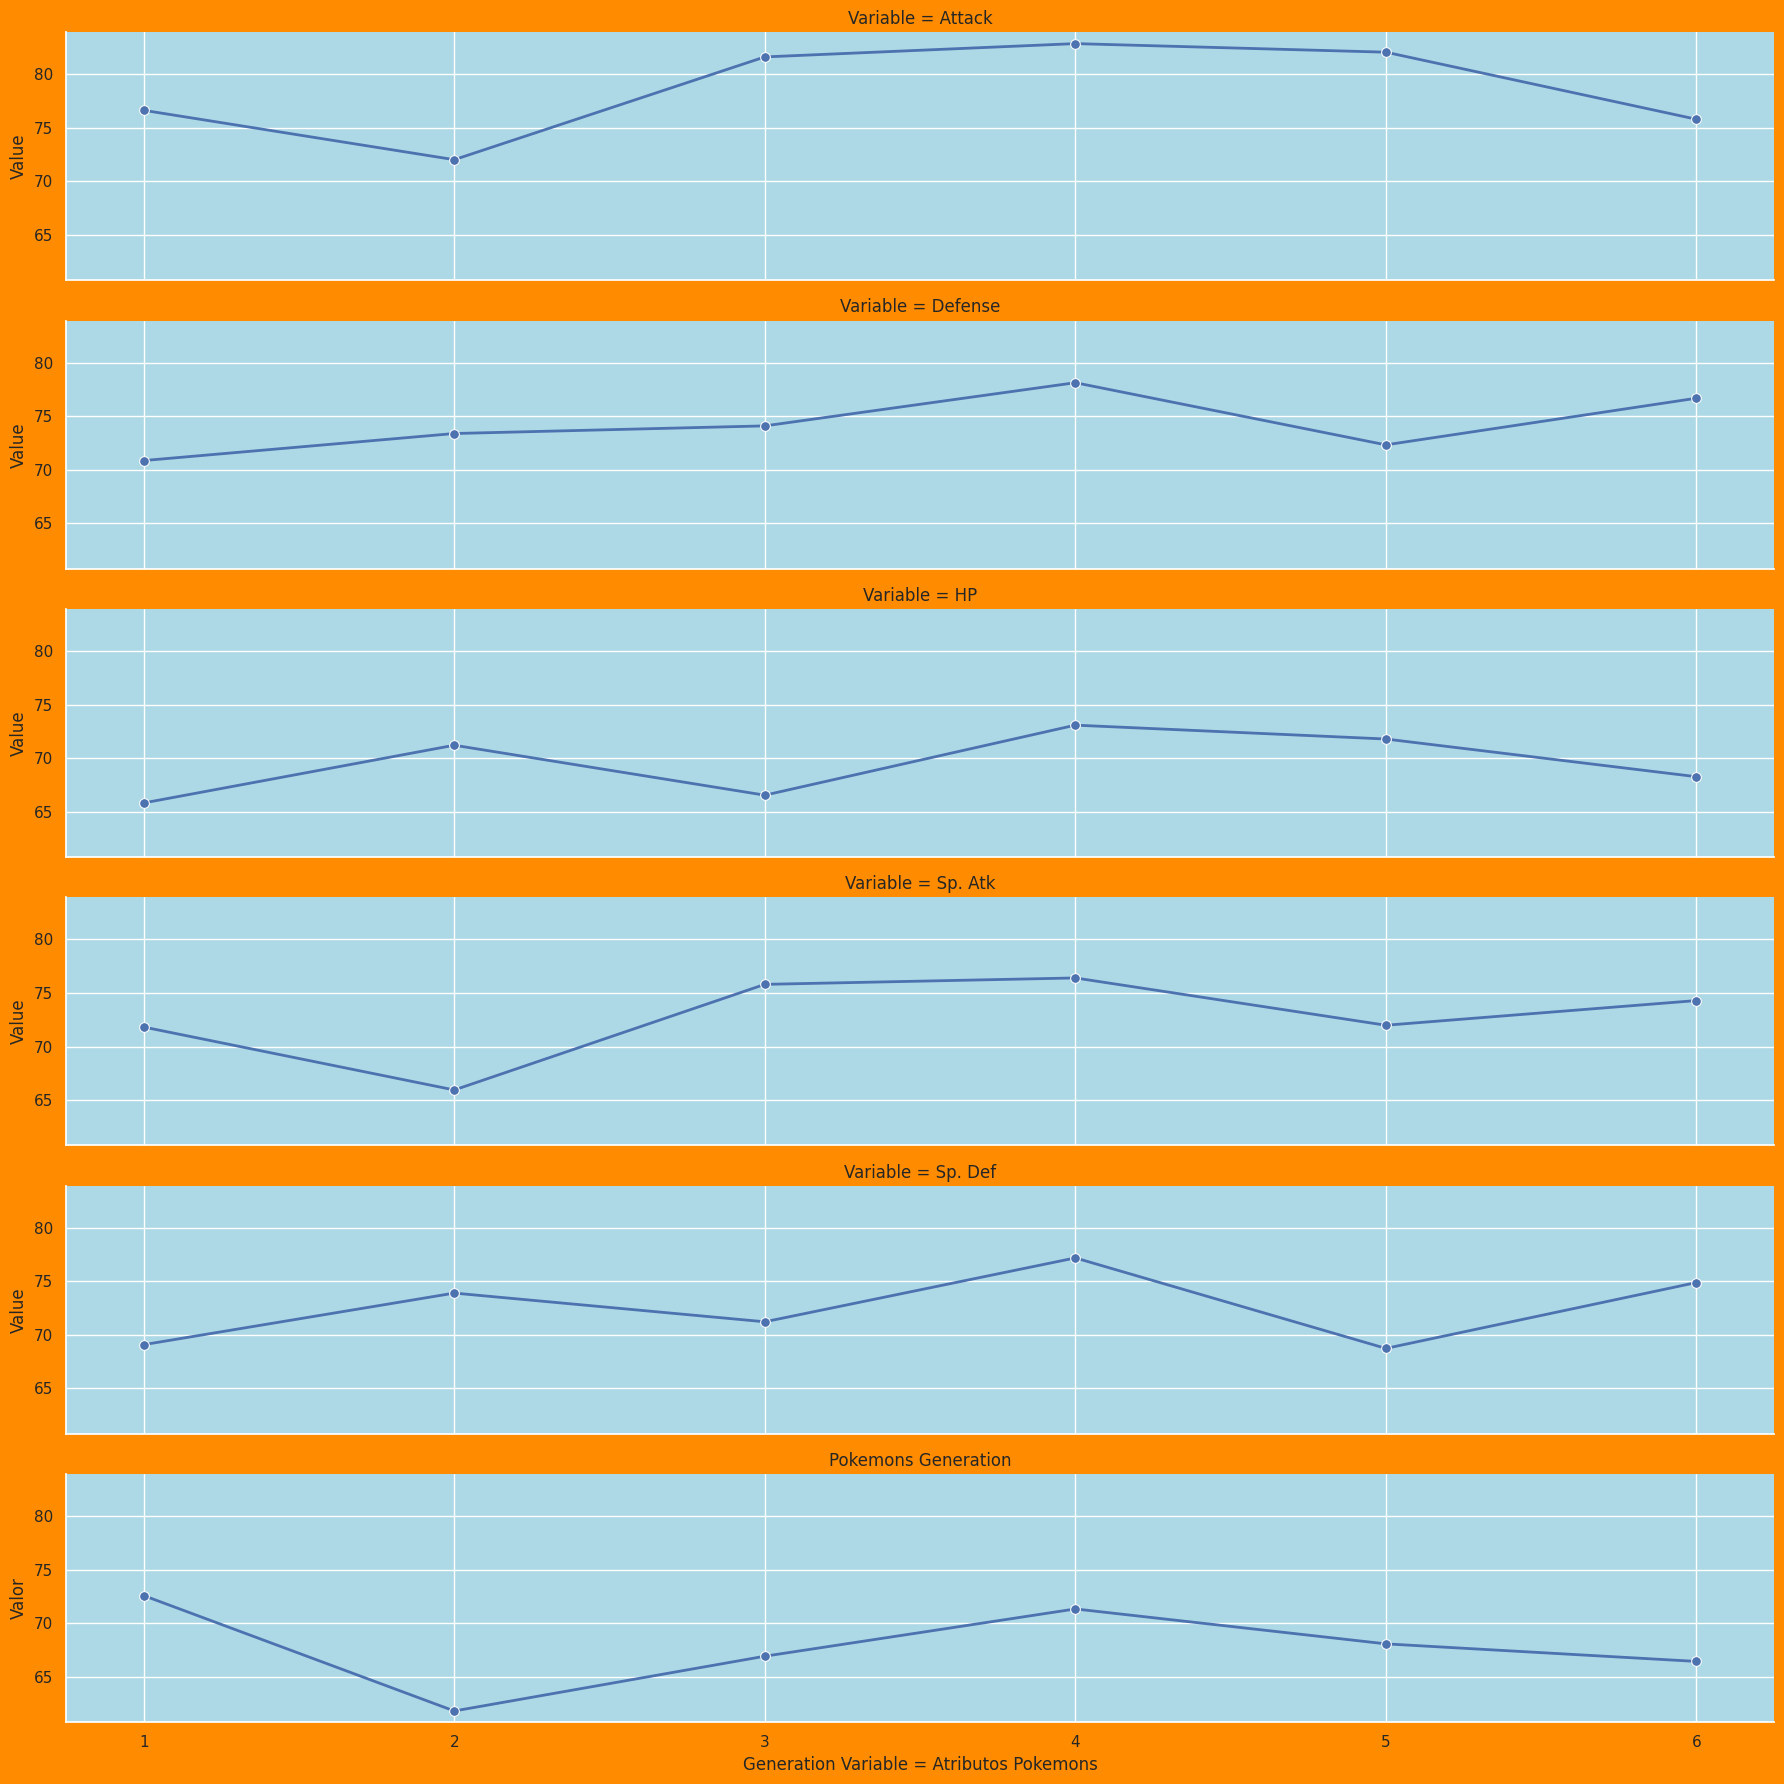

In [100]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'darkorange'})
g = sns.FacetGrid(poquemons_long, row='Variable', aspect=6)
g.map(sns.lineplot, 'Generation', 'Value','Variable', marker='o', markersize=7, linewidth=2)
plt.title('Pokemons Generation')
plt.xlabel('Generation Variable = Atributos Pokemons')
plt.ylabel('Valor')
plt.show()


In [101]:
pokemons_generacion = round(poquemons_generacion.sample(), 2)
pokemons_generacion

Attack  Defense     HP  Sp. Atk  Sp. Def  Speed
Generation                                                 
5            82.07    72.33  71.79    71.99    68.74  68.08

In [102]:
poquemons_generacion_total = poquemons_generacion.sum(axis=1)
poquemons_generacion_total.rename('Total', inplace=True)
poquemons_generacion_total

Generation
1    426.813253
2    418.283019
3    436.225000
4    459.016529
5    434.987879
6    436.378049
Name: Total, dtype: float64

In [103]:
poquemons_generacion_total = poquemons_generacion_total.to_frame()
poquemons_generacion_total.reset_index(inplace=True)
poquemons_generacion_total

Generation       Total
0           1  426.813253
1           2  418.283019
2           3  436.225000
3           4  459.016529
4           5  434.987879
5           6  436.378049

In [104]:
pokemons_legendarios = pokemons.groupby('Generation')['Legendary'].sum().to_frame()
pokemons_legendarios.reset_index(inplace=True)
pokemons_legendarios

Generation  Legendary
0           1          6
1           2          5
2           3         18
3           4         13
4           5         15
5           6          8

In [105]:
poquemons_generacion_total = poquemons_generacion_total.merge(pokemons_legendarios, on='Generation', how='left')
poquemons_generacion_total

Generation       Total  Legendary
0           1  426.813253          6
1           2  418.283019          5
2           3  436.225000         18
3           4  459.016529         13
4           5  434.987879         15
5           6  436.378049          8

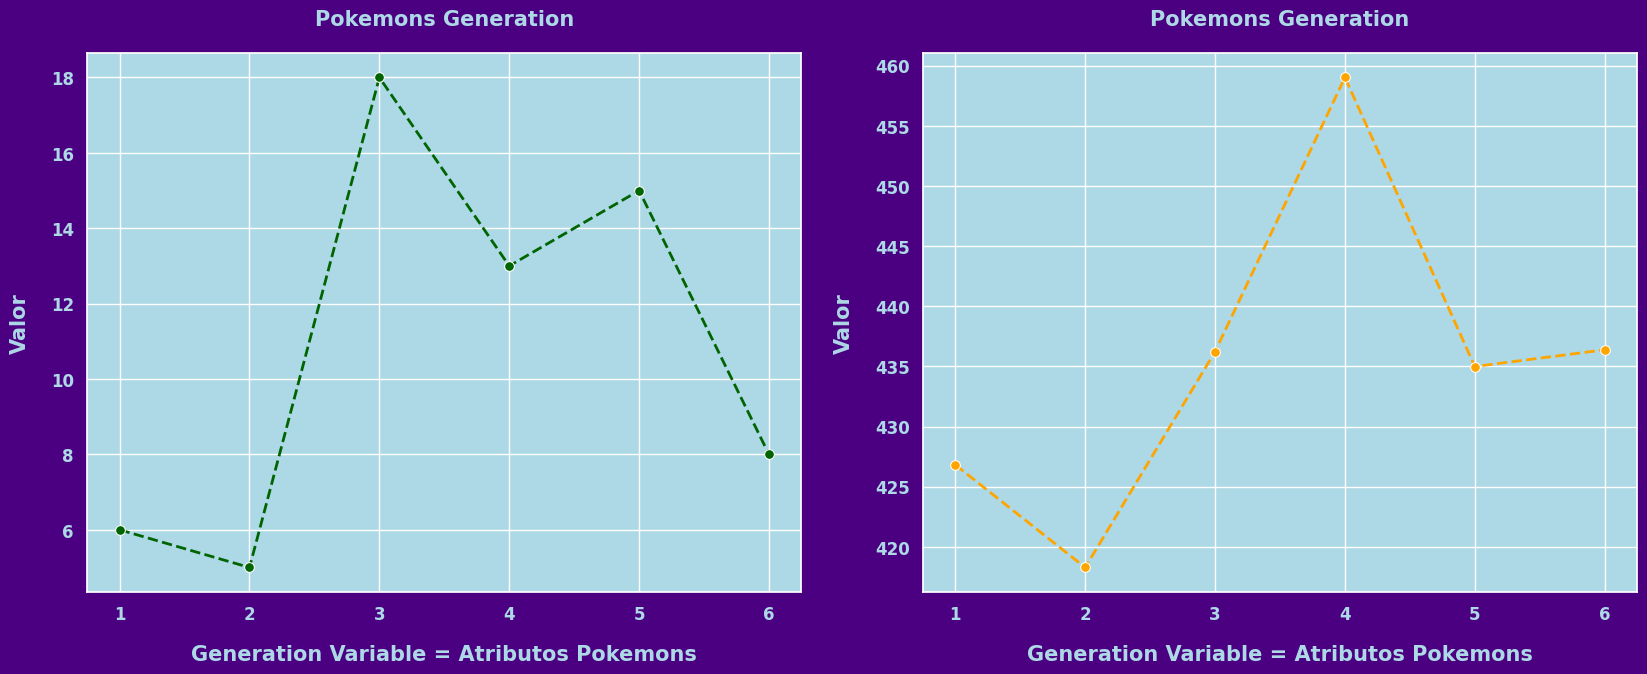

In [106]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.lineplot(data=poquemons_generacion_total, x='Generation', y='Legendary', marker='o', markersize=7, linewidth=2, linestyle='--', color='darkgreen')
plt.title('Pokemons Generation', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Generation Variable = Atributos Pokemons', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Valor', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.subplot(1,2,2)
sns.lineplot(data=poquemons_generacion_total, x='Generation', y='Total', marker='o', markersize=7, linewidth=2, linestyle='--',color='orange')
plt.title('Pokemons Generation', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Generation Variable = Atributos Pokemons', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Valor', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.subplots_adjust(wspace=0.17)
plt.show()

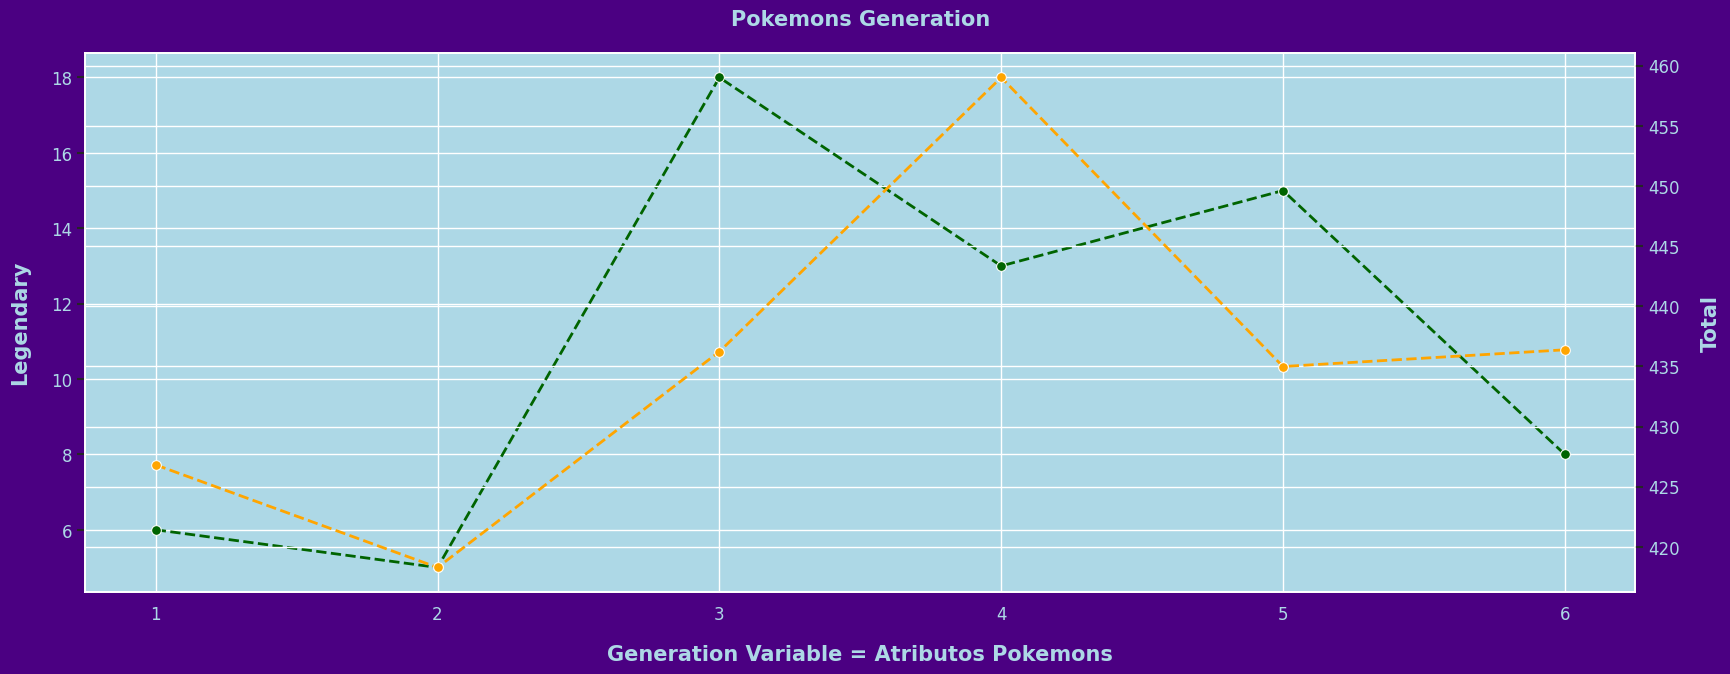

In [107]:
# Configuración de estilo
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'indigo'})
# Crear la figura y el primer eje
fig, ax1 = plt.subplots(figsize=(20, 7))
# Línea en el primer eje y configuración de etiquetas
ax1 = sns.lineplot(data=poquemons_generacion_total, x='Generation', y='Legendary', marker='o', markersize=7, linewidth=2, linestyle='--', color='darkgreen', ax=ax1)
ax1.set_xlabel('Generation Variable = Atributos Pokemons', color='lightblue', size=15, weight='bold', labelpad=15)
ax1.set_ylabel('Legendary', color='lightblue', size=15, weight='bold', labelpad=15)
ax1.tick_params(axis='y', labelcolor='lightblue', labelsize=12, width=1.5)
ax1.tick_params(axis='x', labelcolor='lightblue', labelsize=12, width=1.5)
# Crear el segundo eje
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=poquemons_generacion_total, x='Generation', y='Total', marker='o', markersize=7, linewidth=2, linestyle='--', color='orange', ax=ax2)
ax2.set_ylabel('Total', color='lightblue', size=15, weight='bold', labelpad=15)
ax2.tick_params(axis='y', labelcolor='lightblue', labelsize=12, width=1.5)
ax2.tick_params(axis='x', labelcolor='lightblue', labelsize=12, width=1.5)
# Título del gráfico y ajustes
plt.title('Pokemons Generation', color='lightblue', size=15, weight='bold', pad=20)
plt.show()


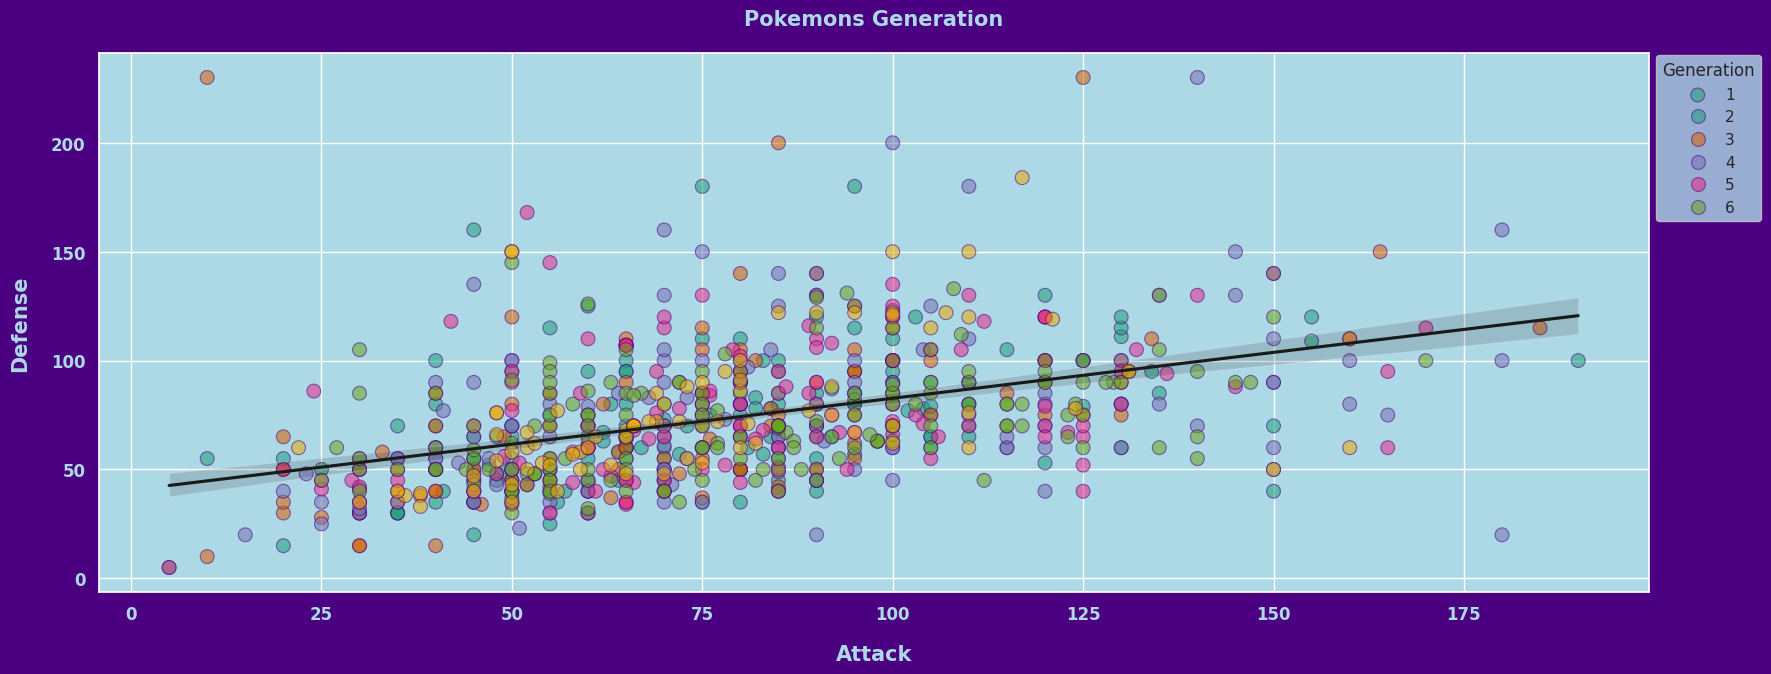

In [108]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'indigo'})
plt.figure(figsize=(20, 7))
sns.scatterplot(data=pokemons, x='Attack', y='Defense', hue='Generation', palette='Dark2', markers='o', s=100, edgecolor='indigo', alpha=0.55)
sns.regplot(data=pokemons, x='Attack', y='Defense', scatter=False, color='k')
plt.title('Pokemons Generation', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Attack', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Defense', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.legend(bbox_to_anchor=(1,1.01), loc='upper left', labels=pokemons['Generation'].unique(), title='Generation')
plt.show()

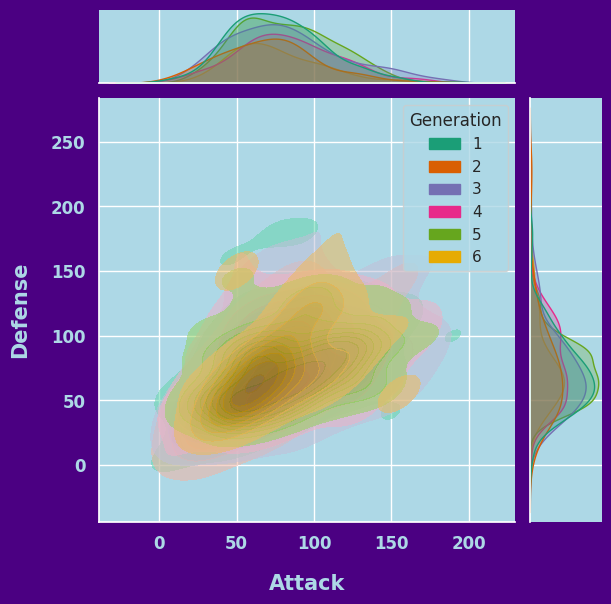

In [109]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'indigo'})
sns.jointplot(data=pokemons, x='Attack', y='Defense', hue='Generation', palette='Dark2', kind='kde', fill=True, alpha=0.55)

plt.title('Pokemons Generation', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Attack', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Defense', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.show()

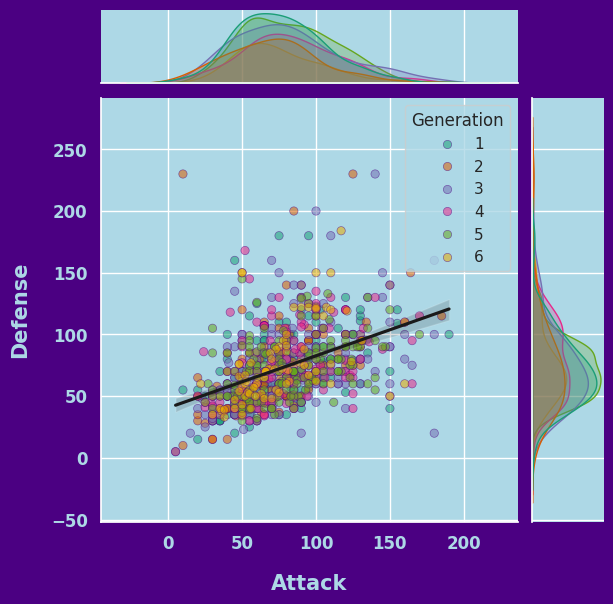

In [110]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'indigo'})
sns.jointplot(data=pokemons, x='Attack', y='Defense', hue='Generation', palette='Dark2', kind='scatter', edgecolor='indigo', alpha=0.55)
sns.regplot(data=pokemons, x='Attack', y='Defense', scatter=False, color='k')
plt.title('Pokemons Generation', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Attack', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Defense', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.show()

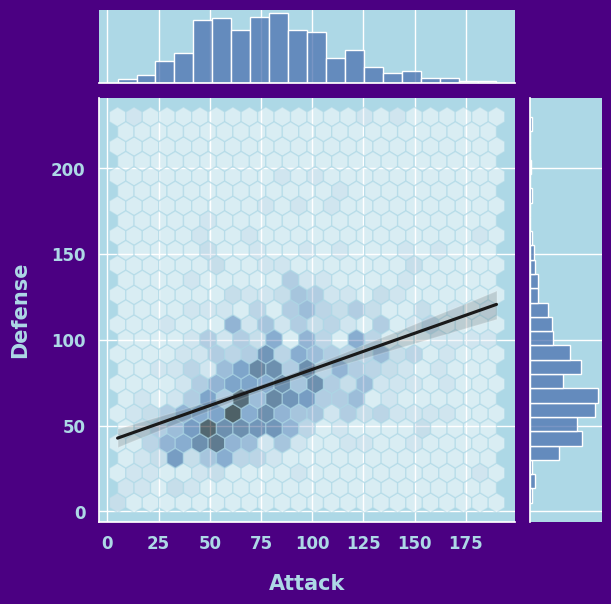

In [111]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'indigo'})
sns.jointplot(data=pokemons, x='Attack', y='Defense', palette='Dark2', kind='hex', alpha=0.55, edgecolor='lightblue')
sns.regplot(data=pokemons, x='Attack', y='Defense', scatter=False, color='k')
plt.title('Pokemons Generation', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Attack', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Defense', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.show()

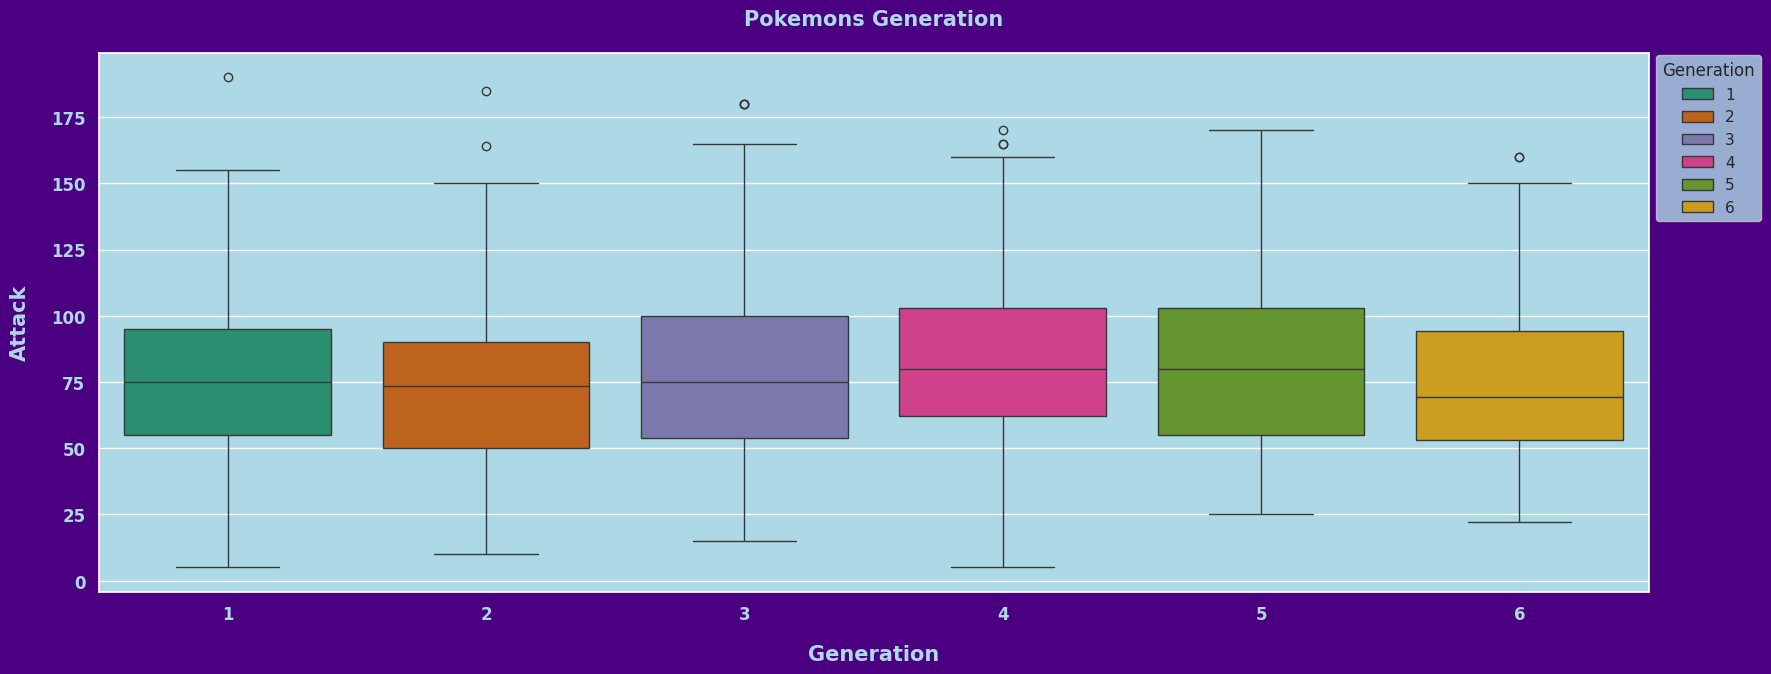

In [112]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'indigo'})
plt.figure(figsize=(20, 7))
sns.boxplot(data=pokemons, x='Generation', y='Attack',hue='Generation', palette='Dark2')
plt.title('Pokemons Generation', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Generation', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Attack', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.legend(loc='best',  title='Generation', bbox_to_anchor=(1,1.01))
plt.show()

In [113]:
pokemons_no_legendarios = pokemons[pokemons['Legendary']==False]
pokemons_no_legendarios.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
1        Ivysaur  Grass  Poison  60      62       63       80       80     60   
2       Venusaur  Grass  Poison  80      82       83      100      100     80   
3  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
4     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  
0           1          0  
1           1          0  
2           1          0  
3           1          0  
4           1          0

In [114]:
pokemons_legendarios = pokemons[pokemons['Legendary']==True]
pokemons_legendarios.head()

Name    Type 1    Type 2   HP  Attack  Defense  Sp. Atk  \
156       Articuno       Ice    Flying   90      85      100       95   
157         Zapdos  Electric    Flying   90      90       85      125   
158        Moltres      Fire    Flying   90     100       90      125   
162         Mewtwo   Psychic       NaN  106     110       90      154   
163  Mega Mewtwo X   Psychic  Fighting  106     190      100      154   

     Sp. Def  Speed  Generation  Legendary  
156      125     85           1          1  
157       90    100           1          1  
158       85     90           1          1  
162       90    130           1          1  
163      100    130           1          1

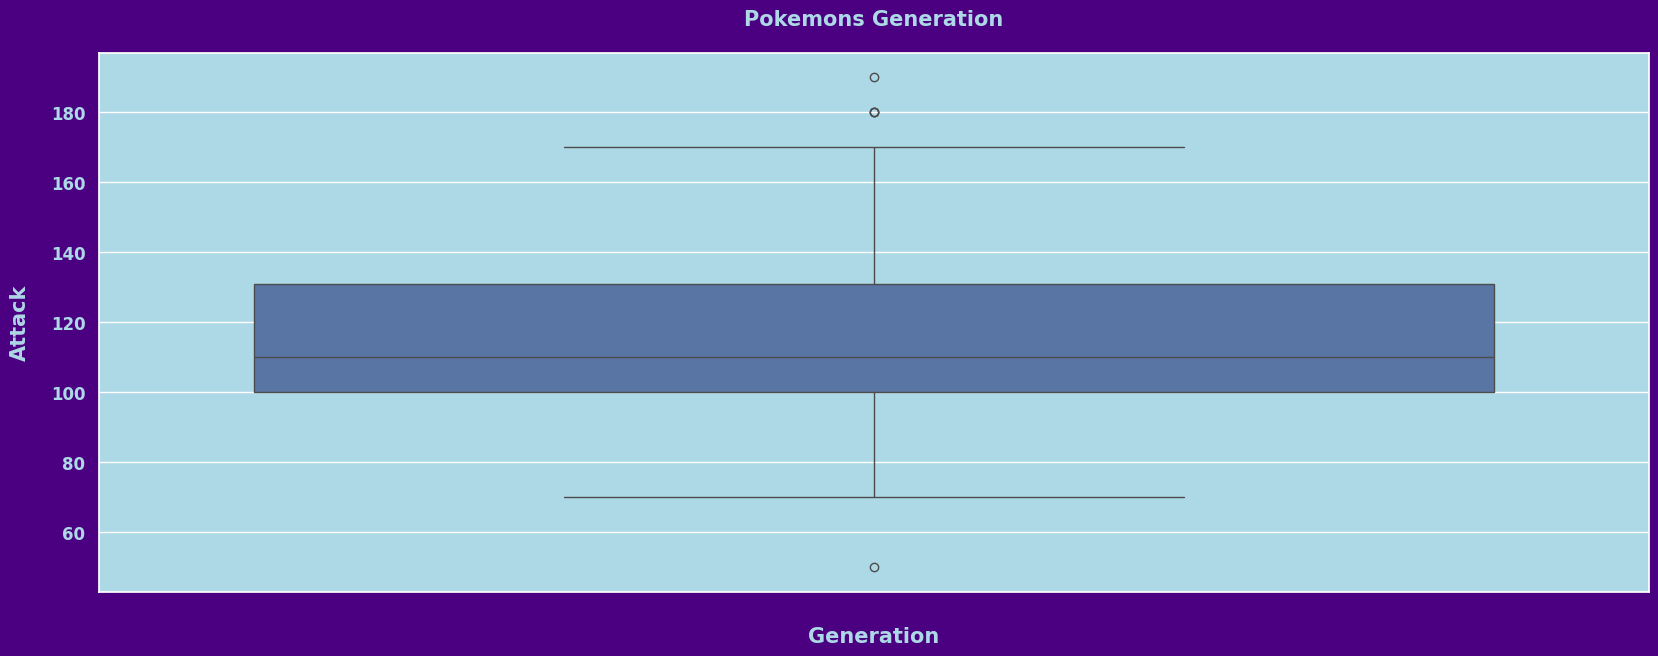

In [115]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'indigo'})
plt.figure(figsize=(20, 7))
sns.boxplot(data=pokemons_legendarios['Attack'])
plt.title('Pokemons Generation', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Generation', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Attack', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.show()

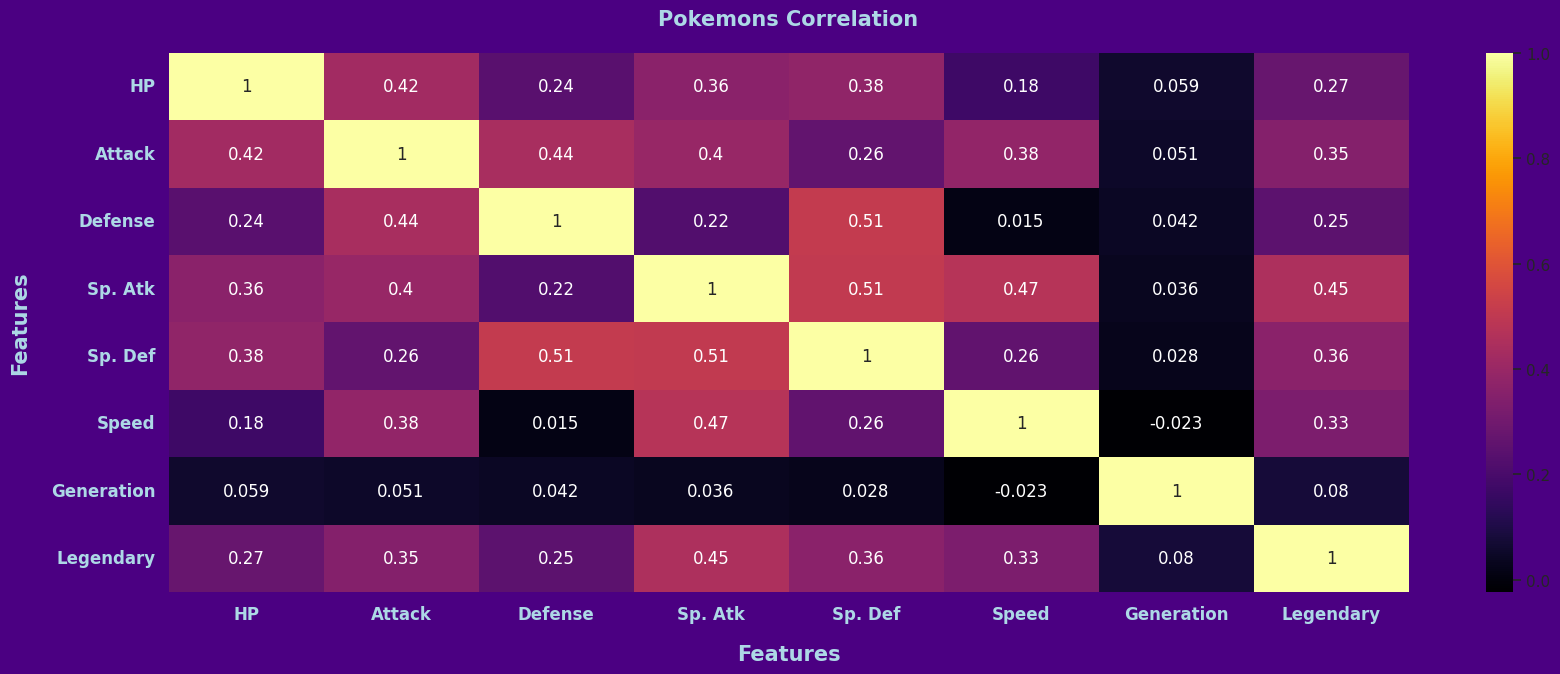

In [116]:
# Select only numeric columns for correlation calculation
numeric_pokemons = pokemons.select_dtypes(include=['number'])

sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'indigo'})
plt.figure(figsize=(20, 7))

# Use the numeric DataFrame for heatmap
sns.heatmap(numeric_pokemons.corr(), annot=True, cmap='inferno')

plt.title('Pokemons Correlation', color='lightblue', size=15, weight='bold', pad=20) # Changed title to reflect the content
plt.xlabel('Features', color='lightblue', size=15, weight='bold', labelpad=15)  # Changed x-axis label
plt.ylabel('Features', color='lightblue', size=15, weight='bold', labelpad=15)  # Changed y-axis label
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.show()

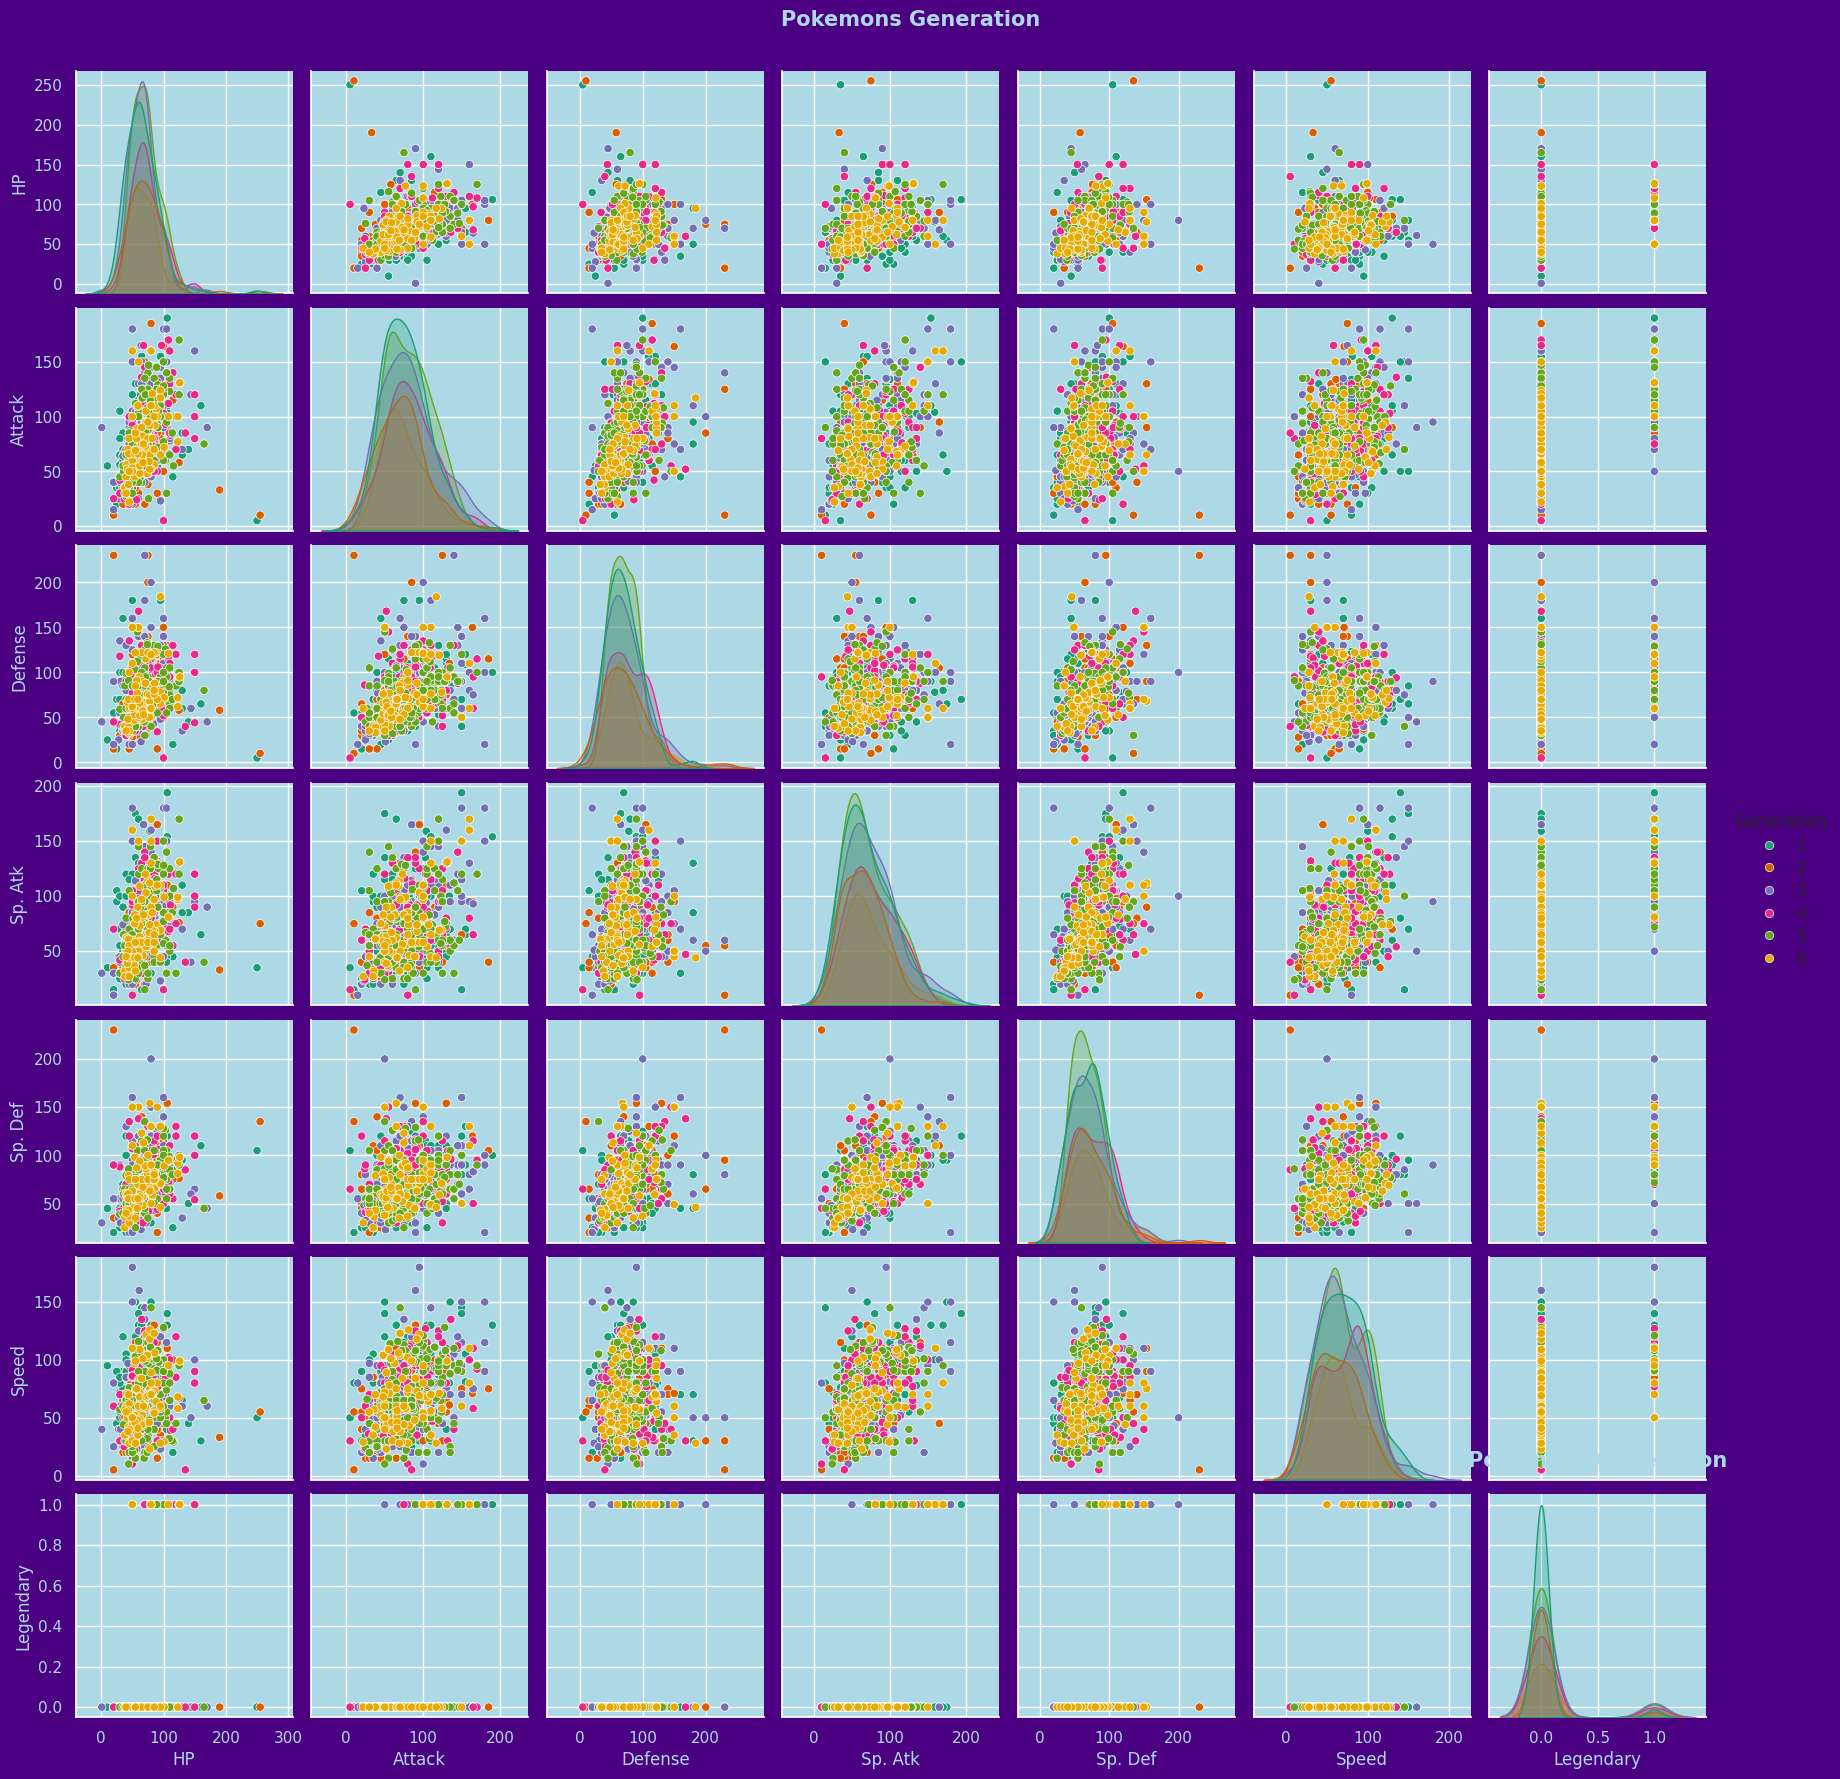

In [117]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'indigo'})
pairplot = sns.pairplot(data=pokemons, hue='Generation', palette='Dark2')
plt.title('Pokemons Generation', color='lightblue', size=15, weight='bold', pad=20)
# Configurar el color de los títulos y etiquetas de los ejes
for ax in pairplot.axes.flatten():
    ax.xaxis.label.set_color('lightblue')  # Color de la etiqueta del eje X
    ax.yaxis.label.set_color('lightblue')  # Color de la etiqueta del eje Y
    ax.title.set_color('lightblue')        # Color del título del subgráfico
    ax.tick_params(axis='x', colors='lightblue')  # Color de las etiquetas de los ejes
    ax.tick_params(axis='y', colors='lightblue')
plt.suptitle('Pokemons Generation', color='lightblue', size=15, weight='bold', y=1.02)
plt.show()

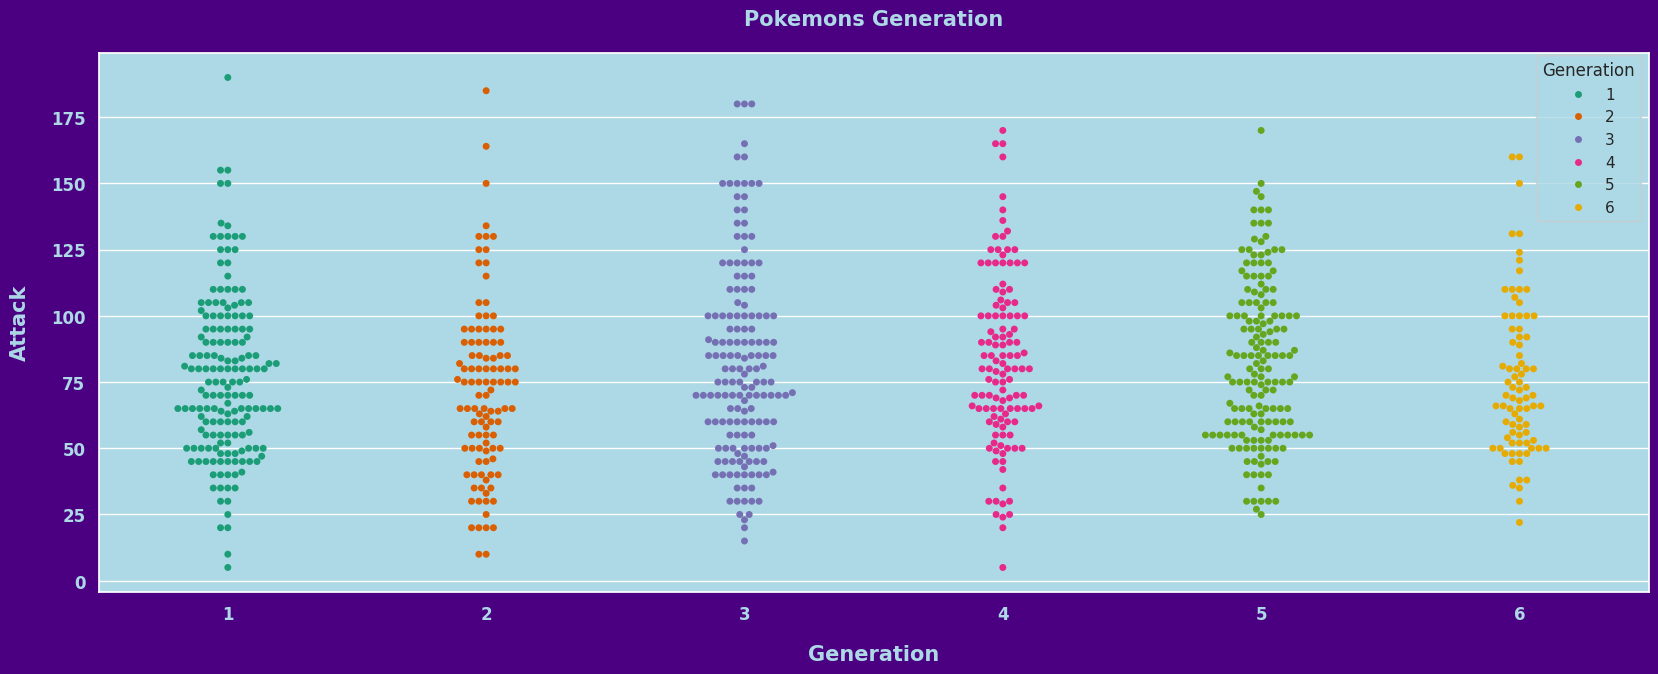

In [118]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'indigo'})
plt.figure(figsize=(20, 7))
sns.swarmplot(data=pokemons, x='Generation', y='Attack', hue='Generation', palette='Dark2')
plt.title('Pokemons Generation', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Generation', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Attack', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.legend(loc='best',  title='Generation', bbox_to_anchor=(1,1.01))
plt.show()

In [129]:
pokemons.sample()

Name Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
84  Rapidash   Fire    NaN  65     100       70       80       80    105   

    Generation  Legendary  
84           1          0

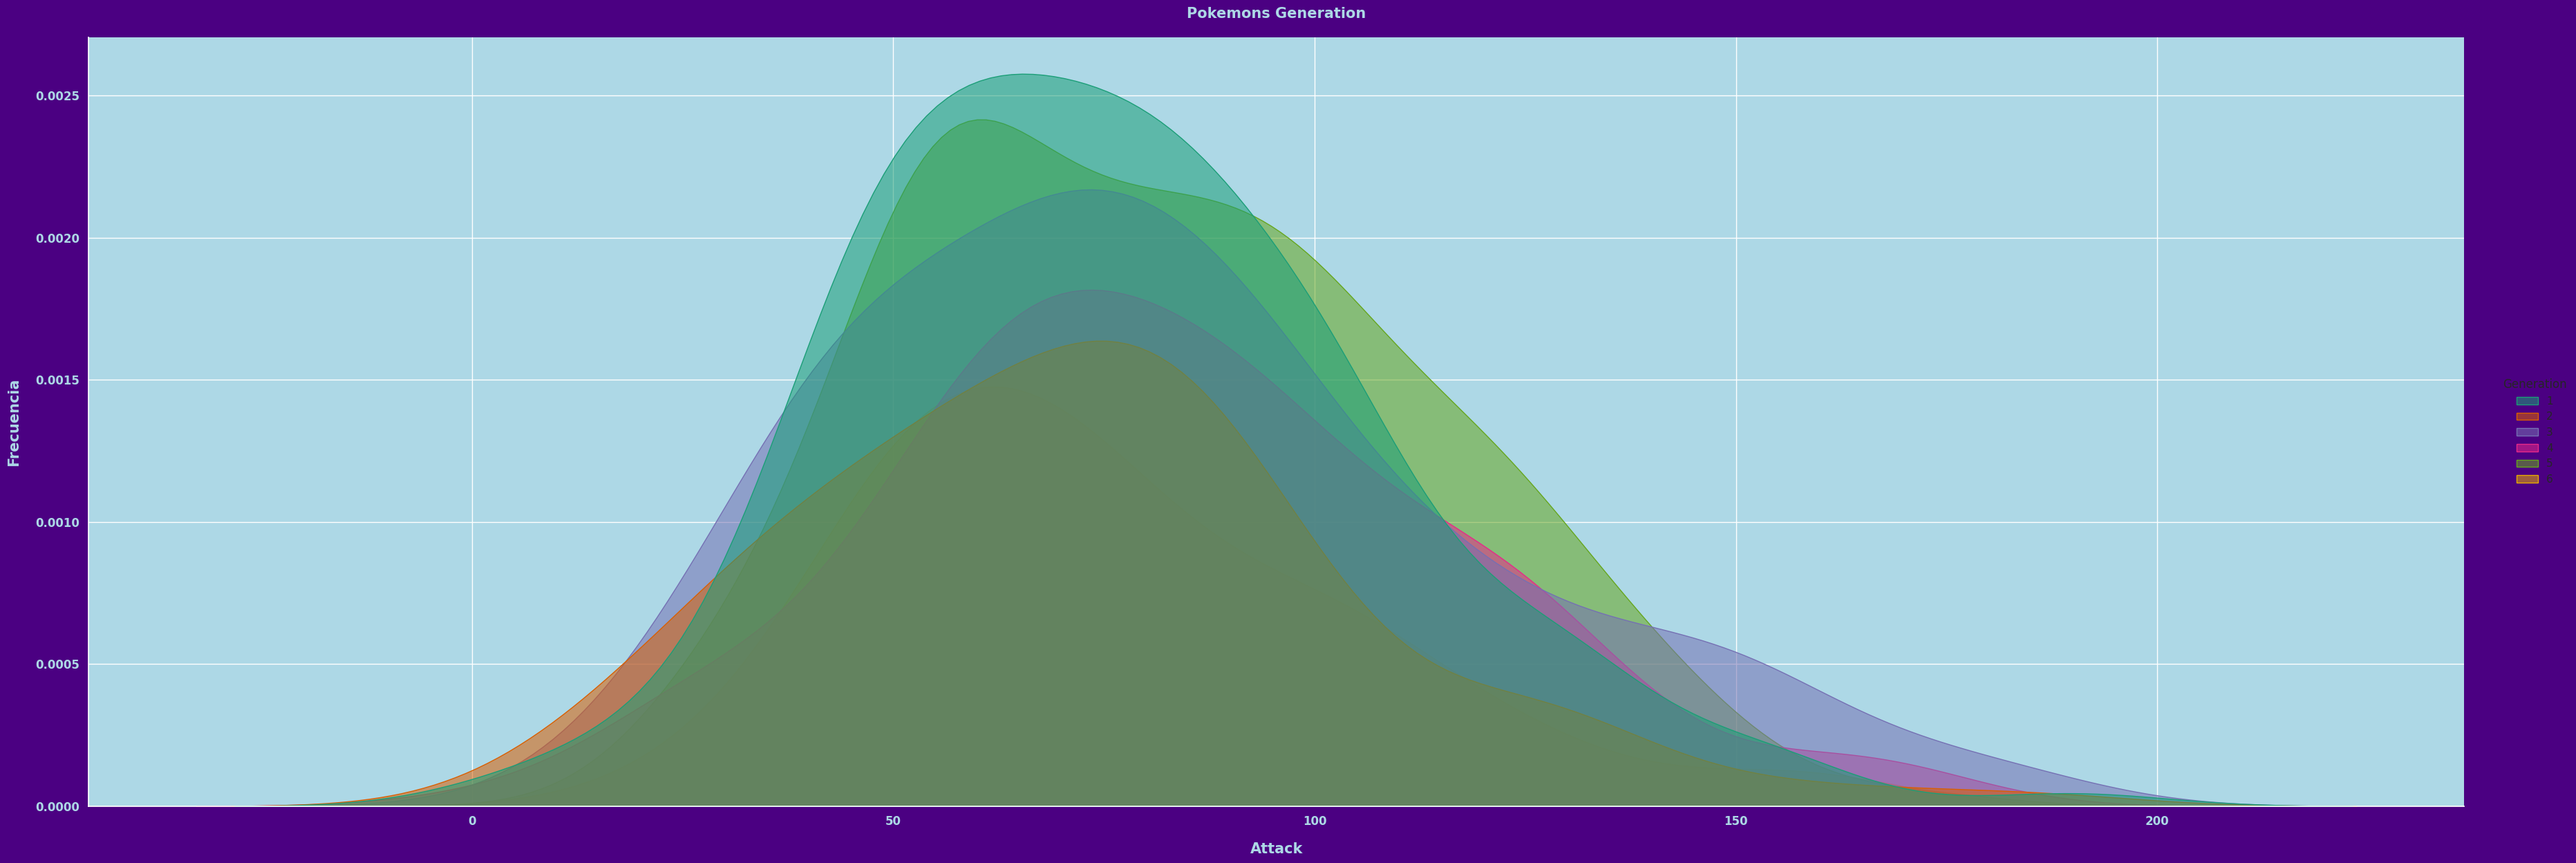

In [144]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'indigo'})
sns.displot(data=pokemons, x='Attack', hue='Generation', palette='Dark2', kind='kde', fill=True, alpha=0.55, aspect=3, height=12)
plt.title('Pokemons Generation', color='lightblue', size=15, weight='bold', pad=20)
plt.xlabel('Attack', color='lightblue', size=15, weight='bold', labelpad=15)
plt.ylabel('Frecuencia', color='lightblue', size=15, weight='bold', labelpad=15)
plt.xticks(color='lightblue', size=12, weight='bold')
plt.yticks(color='lightblue', size=12, weight='bold')
plt.show()